## Professionals and Non Professionals

### Preface
This notebook is just a simple story of how kagglers are differenced as professionals and non professionals. Larger insights were stuffed in simple words. Just focused on the data and not clouded with some random content. Every graph is associated with it's name, question number, points to notice from it. Each part is so simple for even begineers to understand.

There are two types of charts for two sort of questions in survey:
* **Bar plot** - For radio values (Single selectable questions)
* **Square Area plot** - For checkbox values (Multi selectable questions)

### Introduction 
Kagglers among the world from different countries holding different job positions and even different learning techniques had participated in this survey. Kaggle Survey received 25,973 usable responses from participants in different countries and territories.

Our story is about to cover the professionals and non-professionals who took the survey. An explanatory analysis help us in understanding what business people, employees and students and others have and not have in common.

#### Who are they?
##### Professionals
* work **under a company** or **running a business**
* Paying for their **cloud services**

##### Non professionals
* **Students**
* **Not employed**
* Not paying for their **cloud services (employed people)**

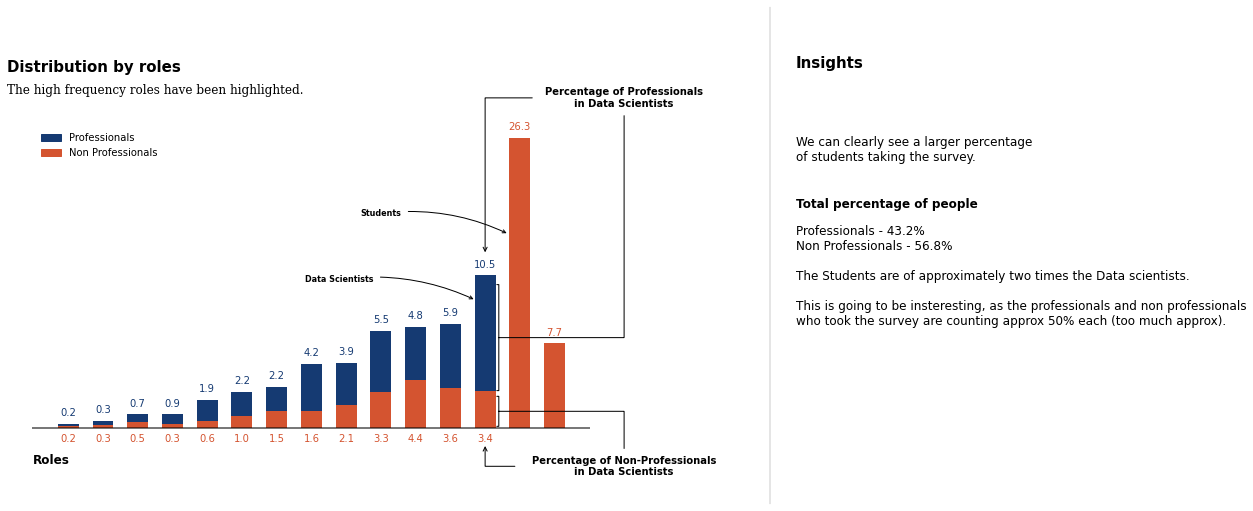

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as lines
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

%matplotlib inline

# Widgets
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

import geopandas

import warnings
warnings.simplefilter("ignore")


p_color = "#153a72"

n_color = "#d45430"

# Importing dataset
dataset = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")

# Slicing questions
questions = dataset.iloc[0, :]
dataset = dataset.iloc[1:, :]

dataset = dataset.loc[dataset["Time from Start to Finish (seconds)"].astype(int) <= 3600]

sdf_q5 = dataset.filter(like="Q5")
sdf_q5_vc = sdf_q5.apply(pd.Series.value_counts).sum(axis=1, skipna = True)
sdf_q5_vc_percent = (100. * sdf_q5_vc / sdf_q5_vc.sum()).round(2)
order = ['Data Scientist', 'Software Engineer', 'Other','Data Analyst','Research Scientist','Machine Learning Engineer','Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 'Statistician', 'DBA/Database Engineer', 'Developer Relations/Advocacy', 'Student', 'Currently not employed']
non_professional = sdf_q5_vc_percent.loc[["Student", "Currently not employed"]]

sdf_q26 = dataset.loc[dataset["Q26"] == "$0 ($USD)"]
sdf_q26_q5 = sdf_q26.filter(like="Q5")
sdf_q26_q5_vc = sdf_q26_q5.apply(pd.Series.value_counts).sum(axis=1, skipna = True)

sdf_q26_q5_vc_percent = (100. * sdf_q26_q5_vc / sdf_q5_vc.sum()).round(2)
sdf_q26_q5_vc_percent.name = "Stack"

sdf_q5_vc_percent_nc = sdf_q5_vc_percent.loc[["Student", "Currently not employed"]]

sdf_q5_vc_percent = sdf_q5_vc_percent.drop(["Student", "Currently not employed"], axis=0)
sdf_q5_vc_percent = sdf_q5_vc_percent - sdf_q26_q5_vc_percent
sdf_q5_vc_percent.name = "Original"

df = pd.merge(sdf_q26_q5_vc_percent, sdf_q5_vc_percent, right_index = True,
               left_index = True)
df.loc[:,'Row_Total'] = df.sum(numeric_only=True, axis=1)
df = df.sort_values("Row_Total")

order = ['Data Scientist', 'Software Engineer', 'Other','Data Analyst','Research Scientist','Machine Learning Engineer','Business Analyst', 'Program/Project Manager', 'Data Engineer', 'Product Manager', 'Statistician', 'DBA/Database Engineer', 'Developer Relations/Advocacy']
non_professional = sdf_q5_vc_percent_nc



# Order for plotting categorical var
ab_order = ['Data Scientist', 'Software Engineer', 'Other',
       'Data Analyst', 'Research Scientist',
       'Machine Learning Engineer', 'Business Analyst',
       'Program/Project Manager', 'Data Engineer', 'Product Manager',
       'Statistician', 'DBA/Database Engineer',
       'Developer Relations/Advocacy']
ab_order_2 = non_professional.index

ab_order.reverse()

data = df["Original"]
data_2 = non_professional

data = data.astype(float)
data_stack = df["Stack"]
data_annotate = df["Row_Total"]
data_annotate = data_annotate.astype(float)
data_stack = data_stack.astype(float)
data_2 = data_2.astype(float)

color_map = [p_color for _ in range(15)]
color_map[-2] = color_map[-1] = n_color 

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(ab_order, data_stack, width=0.6, color=n_color)
ax.bar(ab_order, data, bottom=data_stack, width=0.6, color=color_map)

ax.bar(ab_order_2, data_2, width=0.6,color=color_map[::-1])
# xy=(index-0.3, gender_p[i] + 3)
for i in data.index:
    ax.annotate(f"{round(data[i], 1)}", xy=(i, data_annotate[i] + 1), va = 'center', ha='center',fontweight='light', c=p_color)
    ax.annotate(f"{round(data_stack[i], 1)}", xy=(i, -1), va = 'center', ha='center',fontweight='light', c=n_color)
for i in data_2.index:
    ax.annotate(f"{round(data_2[i], 1)}", xy=(i, data_2[i] + 1), va = 'center', ha='center',fontweight='light', color=n_color)
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# Title and sub-title
fig.text(0.09, 1, 'Distribution by roles', fontsize=15, fontweight='bold')
fig.text(0.09, 0.95, 'The high frequency roles have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.185, 1.01, 'Insights', fontsize=15, fontweight='bold')

fig.text(1.185, 0.795, '''We can clearly see a larger percentage \nof students taking the survey.''', fontsize=12, fontweight='light')

fig.text(1.185, 0.685, '''Total percentage of people''', fontsize=12, fontweight='bold')
fig.text(1.185, 0.680, '''
Professionals - 43.2%
Non Professionals - 56.8%

The Students are of approximately two times the Data scientists. 
\nThis is going to be insteresting, as the professionals and non professionals
who took the survey are counting approx 50% each (too much approx).
'''
         , fontsize=12, fontweight='light', va="top")



ax.set_axisbelow(True)

ax.set_xlabel("Roles", fontsize=12, fontweight='bold',loc='left',y=-1.5)
ax.annotate("Data Scientists", (11.80, 11.5), (8 - 0.2, 13.5), ha="center", va="center", rotation=0, fontsize=8, fontweight='bold', color="#000",
            arrowprops=dict(arrowstyle=r"->",
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.15"))
ax.annotate("Students", (12.75, 17.5), (9, 19.5), ha="center", va="center", rotation=0, fontsize=8, fontweight='bold', color="#000",
            arrowprops=dict(arrowstyle=r"->",
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.15"))
ax.annotate("Percentage of Non-Professionals\nin Data Scientists", (12.25, 1.5), (16, -3.5), ha="center", va="center", rotation=0, fontsize=10, fontweight='bold', color="#000",
            arrowprops=dict(arrowstyle=r"-[,widthB=1.5",
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="angle,angleA=270,angleB=0,rad=0.15"))
ax.annotate("", (12, -1.2), (13, -3.5), color='#000',
            arrowprops=dict(arrowstyle=r"->",
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="angle,angleA=0,angleB=90,rad=0.15"))
ax.annotate("Percentage of Professionals\nin Data Scientists", (12.25, 8.2), (16, 30), ha="center", va="center", rotation=0, fontsize=10, fontweight='bold', color="#000",
            arrowprops=dict(arrowstyle=r"-[,widthB=5.3",
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="angle,angleA=270,angleB=0,rad=0.15"))
ax.annotate("", (12, 15.5), (13.5, 30), color='#244747',
            arrowprops=dict(arrowstyle=r"->",
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="angle,angleA=0,angleB=90,rad=0.15"))
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)

l1 = lines.Line2D([1.15, 1.15], [0, 1.15], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

plt.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF")
plt.xticks(np.arange(0), [])
plt.yticks(np.arange(-2, 27, 1))
ax.get_yaxis().set_visible(False)
plt.show()

### Points to notice:
* Surveyers in all roles approximately have 20% to 50% of non-professionals, only because they aren't paying for cloud services
* It is natural to choose between paid or free cloud services. **The professions like Data Analyst, Sofware Engineer, Data Scientist are having larger percentage of surveyers who are non-professionals**

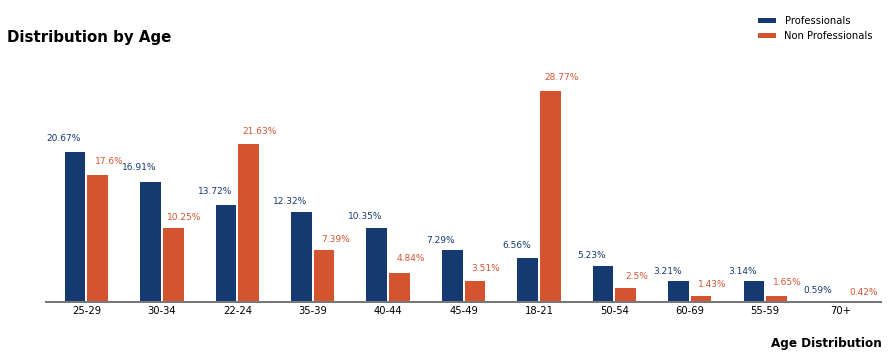

In [2]:
professionals = dataset.loc[(dataset["Q5"] != "Student") & (dataset["Q5"] != "Currently not employed") & (dataset["Q26"] != "$0 ($USD)")]
non_professionals = dataset.loc[(dataset["Q5"] == "Student") | (dataset["Q5"] == "Currently not employed") | (dataset["Q26"] == "$0 ($USD)")]

age_p = professionals["Q1"]
age_np = non_professionals["Q1"]

age_p = (age_p.value_counts()/age_p.value_counts().sum()*100).round(2)
age_np = (age_np.value_counts()/age_np.value_counts().sum()*100).round(2)

age_p = age_p[::-1]
age_df = pd.DataFrame({"Professionals": age_p, "Non Professionals": age_np}, index = age_p.index.T)

age_df.loc[:, 'Professionals'] = age_df.loc[:, 'Professionals'].astype(int)
age_df.loc[:, 'Non Professionals'] = age_df.loc[:, 'Non Professionals'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(15,6))
age_df[::-1].plot.bar(width=0.6, color=[p_color, n_color], ax=ax, ec='#FFF', lw=2)

fig.text(0.09, 0.8, 'Distribution by Age', fontsize=15, fontweight='bold')
for index, i in enumerate(age_p[::-1].index):
    if index >= 0:
        ax.annotate(f"{age_p[i]}%", xy=(index-0.3, age_p[i] + 1), c=p_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{age_np[i]}%", xy=(index+0.3, age_np[i] + 1), c=n_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{age_df[::-1].index[index]}", xy=(index, -1), va = 'center', ha='center',fontweight='light')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


plt.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)


ax.set_axisbelow(True)

ax.set_xlabel("Age Distribution", fontsize=12, fontweight='bold',loc='right',y=-1.5)
plt.xticks(np.arange(0), [])
ax.get_yaxis().set_visible(False)
plt.yticks(np.arange(-4, 40, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

### Points to notice:
* **Age between 18-24** are mostly non professionals among surveyers
* Almost all senior aged people are **profeesionals**

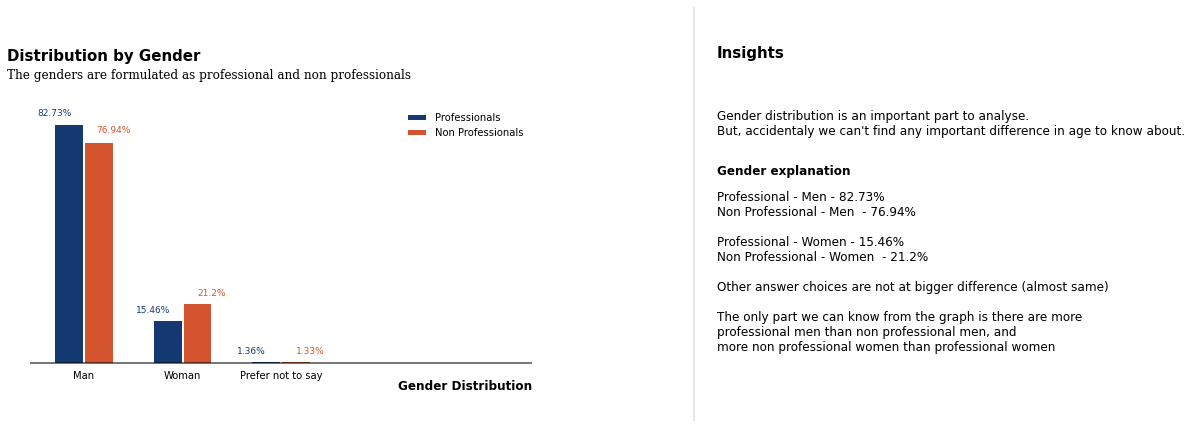

In [3]:
professionals = dataset.loc[(dataset["Q5"] != "Student") & (dataset["Q5"] != "Currently not employed") & (dataset["Q26"] != "$0 ($USD)")]
non_professionals = dataset.loc[(dataset["Q5"] == "Student") | (dataset["Q5"] == "Currently not employed") | (dataset["Q26"] == "$0 ($USD)")]

gender_p = professionals["Q2"]
gender_np = non_professionals["Q2"]

gender_p = (gender_p.value_counts()/gender_p.value_counts().sum()*100).round(2)
gender_np = (gender_np.value_counts()/gender_np.value_counts().sum()*100).round(2)

gender_p = gender_p[::-1]
gender_df = pd.DataFrame({"Professionals": gender_p, "Non Professionals": gender_np}, index = gender_p.index.T)

gender_df.loc[:, 'Professionals'] = gender_df.loc[:, 'Professionals'].astype(int)
gender_df.loc[:, 'Non Professionals'] = gender_df.loc[:, 'Non Professionals'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
gender_df[::-1].plot.bar(width=0.6, color=[p_color, n_color], ax=ax, ec='#FFF', lw=2)

for index, i in enumerate(gender_p[::-1].index):
    if index == 0 or index == 1 or index == 2:
        ax.annotate(f"{gender_p[i]}%", xy=(index-0.3, gender_p[i] + 3), c=p_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{gender_np[i]}%", xy=(index+0.3, gender_np[i] + 3), c=n_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{gender_df[::-1].index[index]}", xy=(index, -4), va = 'center', ha='center',fontweight='light')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
fig.text(0.09, 1, 'Distribution by Gender', fontsize=15, fontweight='bold')
fig.text(0.09, 0.95, 'The genders are formulated as professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.185, 1.01, 'Insights', fontsize=15, fontweight='bold')
fig.text(1.185, 0.795, '''Gender distribution is an important part to analyse.\nBut, accidentaly we can't find any important difference in age to know about.''', fontsize=12, fontweight='light')
fig.text(1.185, 0.685, '''Gender explanation''', fontsize=12, fontweight='bold')
fig.text(1.185, 0.680, '''
Professional - Men - 82.73%
Non Professional - Men  - 76.94%

Professional - Women - 15.46%
Non Professional - Women  - 21.2%

Other answer choices are not at bigger difference (almost same)

The only part we can know from the graph is there are more
professional men than non professional men, and 
more non professional women than professional women
'''
         , fontsize=12, fontweight='light', va="top")


plt.axhline(y = 0.5, color = 'black', linewidth = 1.5, alpha = .7)

l1 = lines.Line2D([1.15, 1.15], [0, 1.15], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])

ax.set_axisbelow(True)

ax.set_xlabel("Gender Distribution", fontsize=12, fontweight='bold',loc='right',y=-2.5)
plt.xticks(np.arange(0), [])
ax.get_yaxis().set_visible(False)
plt.yticks(np.arange(-4, 90, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

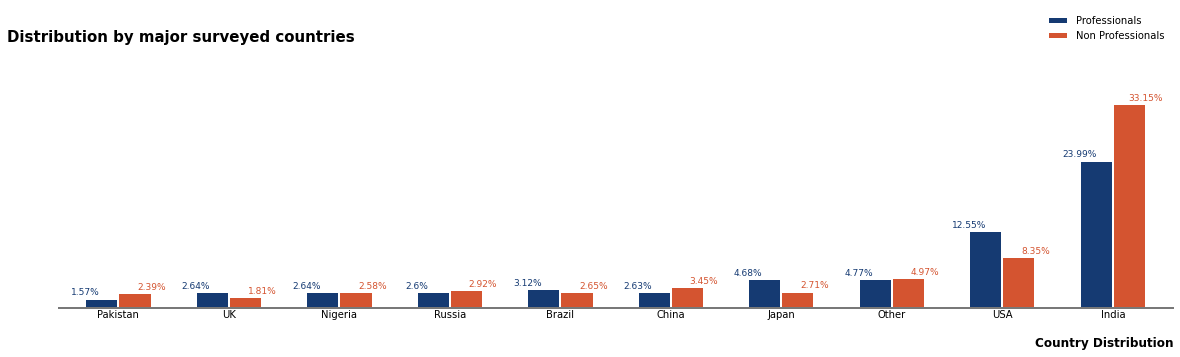

In [4]:
country_p = professionals["Q3"]
country_np = non_professionals["Q3"]

country_p = (country_p.value_counts()/country_p.value_counts().sum()*100).round(2)
country_np = (country_np.value_counts()/country_np.value_counts().sum()*100).round(2)

country_df = pd.DataFrame({"Professionals": country_p, "Non Professionals": country_np}, index = country_p.index.T)

country_df["Total"] = country_df["Professionals"] + country_df["Non Professionals"]
country_df = country_df.nlargest(10, 'Total')
country_df = country_df.set_axis(['India', 'USA', 'Other', 'Japan', 'China', 'Brazil', 'Russia', 'Nigeria', 'UK', 'Pakistan'], axis=0)

country_df.drop('Total', axis='columns', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(20,6))
country_df.iloc[::-1].plot.bar(width=0.6, color=[p_color, n_color], ax=ax, ec='#FFF', lw=2)

fig.text(0.09, 0.8, 'Distribution by major surveyed countries', fontsize=15, fontweight='bold')
for index, i in enumerate(country_df[::-1].index):
    if index >= 0:
        ax.annotate(f"{country_df.loc[i, 'Professionals']}%", xy=(index-0.3, country_df.loc[i, 'Professionals'] + 1), c=p_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{country_df.loc[i, 'Non Professionals']}%", xy=(index+0.3, country_df.loc[i, 'Non Professionals'] + 1), c=n_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{country_df[::-1].index[index]}", xy=(index, -1), va = 'center', ha='center',fontweight='light')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


plt.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)


ax.set_axisbelow(True)

ax.set_xlabel("Country Distribution", fontsize=12, fontweight='bold',loc='right',y=-1.5)
plt.xticks(np.arange(0), [])
ax.get_yaxis().set_visible(False)
plt.yticks(np.arange(-4, 50, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

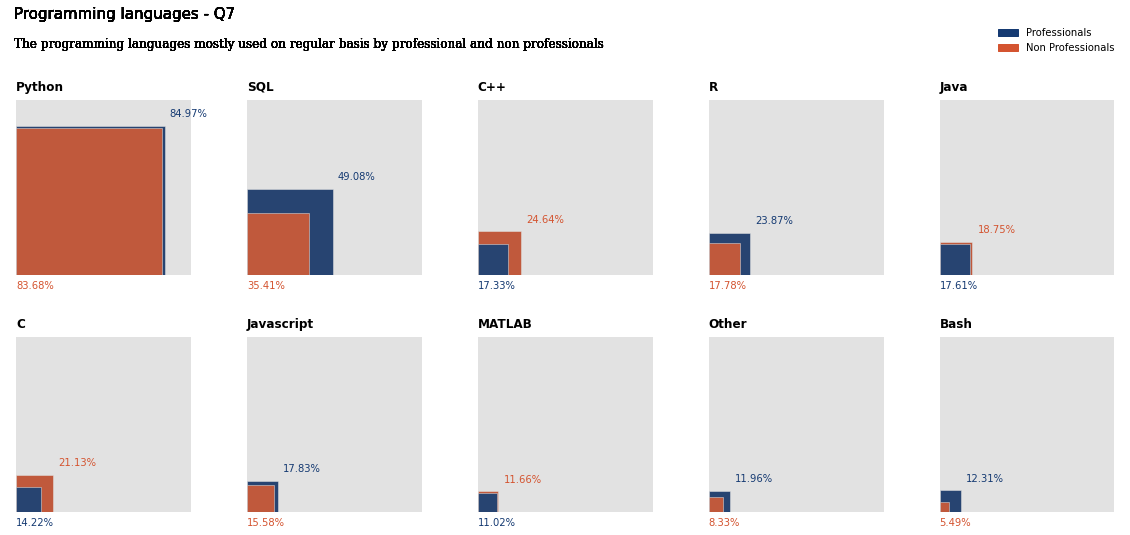

In [5]:
temp_language_p = professionals.filter(like="Q7")
temp_language_np = non_professionals.filter(like="Q7")


temp1 = []
temp2 = []

for i in range(len(temp_language_p.columns)):
    p_value = temp_language_p.iloc[:, i].value_counts()
    np_value = temp_language_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
language_p = pd.concat(temp1)
language_np = pd.concat(temp2)

language_p = (language_p/len(professionals)*100).round(2)
language_np = (language_np/len(non_professionals)*100).round(2)

language_df = pd.DataFrame({"Professionals": language_p, "Non Professionals": language_np}, index = language_p.index.T)

language_df_g = language_df.loc[(language_df["Professionals"] >= 2) | (language_df["Non Professionals"] >= 2)]

language_df_g["Total"] = language_df_g["Professionals"] + language_df_g["Non Professionals"]
language_df_g.sort_values("Total", ascending=False, inplace=True)

language_df_g = language_df_g.div(100)

row = 2
col = 5
fig = plt.figure(figsize=(20, row*4))
for i in range(len(language_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = language_df_g.iloc[i, 0]
    non_professional_percent = language_df_g.iloc[i, 1]
    fig.text(0.13, 1, 'Programming languages - Q7', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.95, 'The programming languages mostly used on regular basis by professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="roman")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="roman")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="roman")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="roman")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, language_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

### Points to notice:
* Surveyers mostly use **Python** as their primary language
* Surveyers have minimal difference in using **MATLAB** and **Java**.

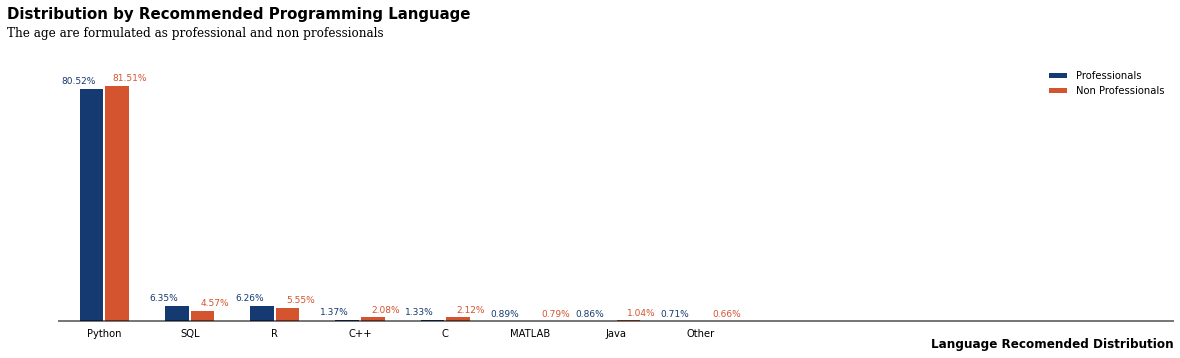

In [6]:
rl_p = professionals["Q8"]
rl_np = non_professionals["Q8"]

rl_p = (rl_p.value_counts()/rl_p.value_counts().sum()*100).round(2)
rl_np = (rl_np.value_counts()/rl_np.value_counts().sum()*100).round(2)

rl_p = rl_p[::-1]
rl_df = pd.DataFrame({"Professionals": rl_p, "Non Professionals": rl_np}, index = rl_p.index.T)

rl_df.loc[:, 'Professionals'] = rl_df.loc[:, 'Professionals'].astype(int)
rl_df.loc[:, 'Non Professionals'] = rl_df.loc[:, 'Non Professionals'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
rl_df[::-1].plot.bar(width=0.6, color=[p_color, n_color], ax=ax, ec='#FFF', lw=2)

for index, i in enumerate(rl_p[::-1].index):
    if index <= 7:
        ax.annotate(f"{rl_p[i]}%", xy=(index-0.3, rl_p[i] + 2), c=p_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{rl_np[i]}%", xy=(index+0.3, rl_np[i] + 2), c=n_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{rl_df[::-1].index[index]}", xy=(index, -4), va = 'center', ha='center',fontweight='light')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.09, 1, 'Distribution by Recommended Programming Language', fontsize=15, fontweight='bold')
fig.text(0.09, 0.95, 'The age are formulated as professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')


plt.axhline(y = 0.5, color = 'black', linewidth = 1.5, alpha = .7)


ax.set_axisbelow(True)

ax.set_xlabel("Language Recomended Distribution", fontsize=12, fontweight='bold',loc='right',y=-2.5)
plt.xticks(np.arange(0), [])
ax.get_yaxis().set_visible(False)
plt.yticks(np.arange(-4, 90, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

### Points to notice:
* Surveyers recommend **python** as their preferred programming language

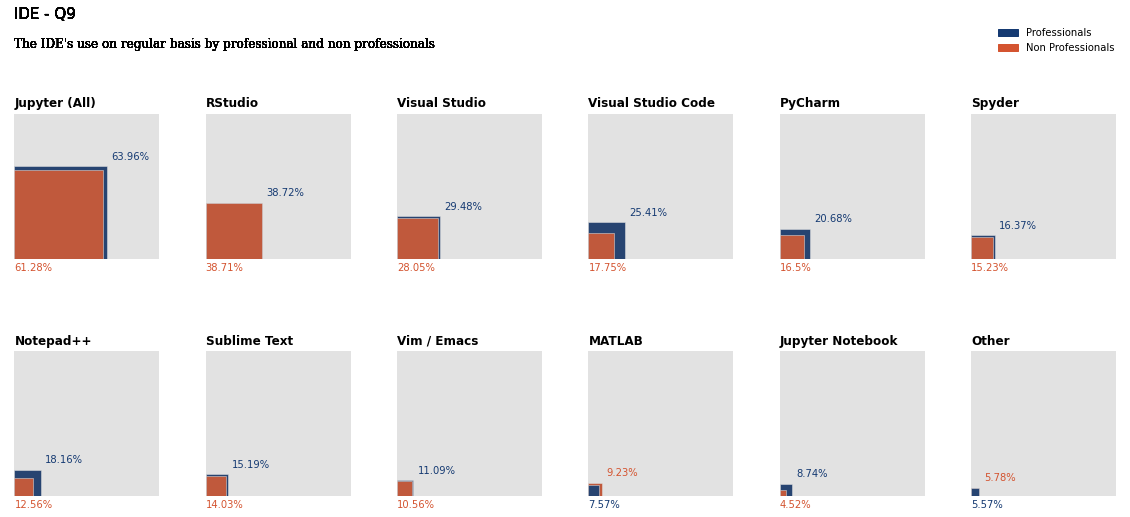

In [7]:
temp_ide_p = professionals.filter(like="Q9")
temp_ide_np = non_professionals.filter(like="Q9")

temp1 = []
temp2 = []

for i in range(len(temp_ide_p.columns)):
    p_value = temp_ide_p.iloc[:, i].value_counts()
    np_value = temp_ide_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
ide_p = pd.concat(temp1)
ide_np = pd.concat(temp2)

ide_p = (ide_p/len(professionals)*100).round(2)
ide_np = (ide_np/len(non_professionals)*100).round(2)

ide_df = pd.DataFrame({"Professionals": ide_p, "Non Professionals": ide_np}, index = ide_p.index.T)

ide_df_g = ide_df.loc[(ide_df["Professionals"] >= 5) | (ide_df["Non Professionals"] >= 5)]

ide_df_g["Total"] = ide_df_g["Professionals"] + ide_df_g["Non Professionals"]
ide_df_g.sort_values("Total", ascending=False, inplace=True)

ide_df_g = ide_df_g.div(100)

ide_df_g = ide_df_g.set_axis(['Jupyter (All)', 'RStudio', 'Visual Studio', 'Visual Studio Code', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim / Emacs', 'MATLAB', 'Jupyter Notebook', 'Other'], axis=0)

row = 2
col = 6
fig = plt.figure(figsize=(20, row*4))
for i in range(len(ide_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = ide_df_g.iloc[i, 0]
    non_professional_percent = ide_df_g.iloc[i, 1]
    fig.text(0.13, 1, 'IDE - Q9', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.95, 'The IDE\'s use on regular basis by professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="roman")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="roman")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="roman")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="roman")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, ide_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

### Points to notice:
* **Jupyter** users are so close among surveyers
* **RStudio**, **Visual Studio**, **Sublime** and **Spyder** are having nearest difference in professionals and non professionals

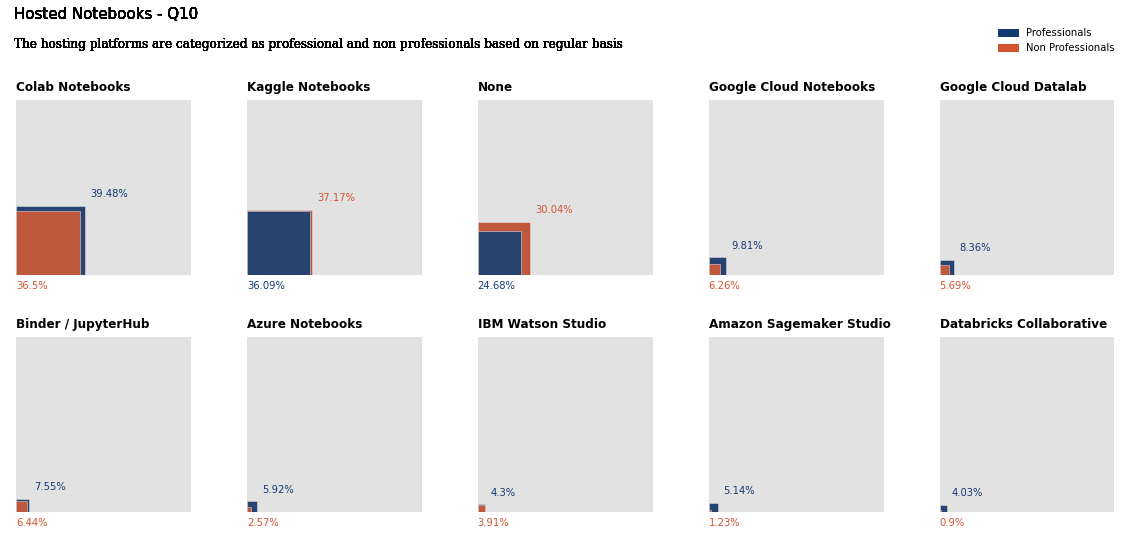

In [8]:
temp_host_nb_p = professionals.filter(like="Q10")
temp_host_nb_np = non_professionals.filter(like="Q10")

temp1 = []
temp2 = []

for i in range(len(temp_host_nb_p.columns)):
    p_value = temp_host_nb_p.iloc[:, i].value_counts()
    np_value = temp_host_nb_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
host_nb_p = pd.concat(temp1)
host_nb_np = pd.concat(temp2)

host_nb_p = (host_nb_p/len(professionals)*100).round(2)
host_nb_np = (host_nb_np/len(non_professionals)*100).round(2)

host_nb_df = pd.DataFrame({"Professionals": host_nb_p, "Non Professionals": host_nb_np}, index = host_nb_p.index.T)

host_nb_df_g = host_nb_df.loc[(host_nb_df["Professionals"] >= 4) | (host_nb_df["Non Professionals"] >= 4)]

host_nb_df_g["Total"] = host_nb_df_g["Professionals"] + host_nb_df_g["Non Professionals"]
host_nb_df_g.sort_values("Total", ascending=False, inplace=True)

host_nb_df_g = host_nb_df_g.div(100)
host_nb_df_g = host_nb_df_g.set_axis(['Colab Notebooks', 'Kaggle Notebooks', 'None', 'Google Cloud Notebooks', 'Google Cloud Datalab', 'Binder / JupyterHub', 'Azure Notebooks', 'IBM Watson Studio', 'Amazon Sagemaker Studio', 'Databricks Collaborative'], axis=0)

row = 2
col = 5
fig = plt.figure(figsize=(20, row*4))
for i in range(len(host_nb_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = host_nb_df_g.iloc[i, 0]
    non_professional_percent = host_nb_df_g.iloc[i, 1]
    fig.text(0.13, 1, 'Hosted Notebooks - Q10', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.95, 'The hosting platforms are categorized as professional and non professionals based on regular basis', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="roman")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="roman")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="roman")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="roman")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, host_nb_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

### Points to notice:
* **Colab Notebook** mostly used by professionals.
* **Kaggle Notebook** have minimal difference between professionals and non professionals.
* **Databricks Collaborative Notebook** have small amount of reach among surveyers.

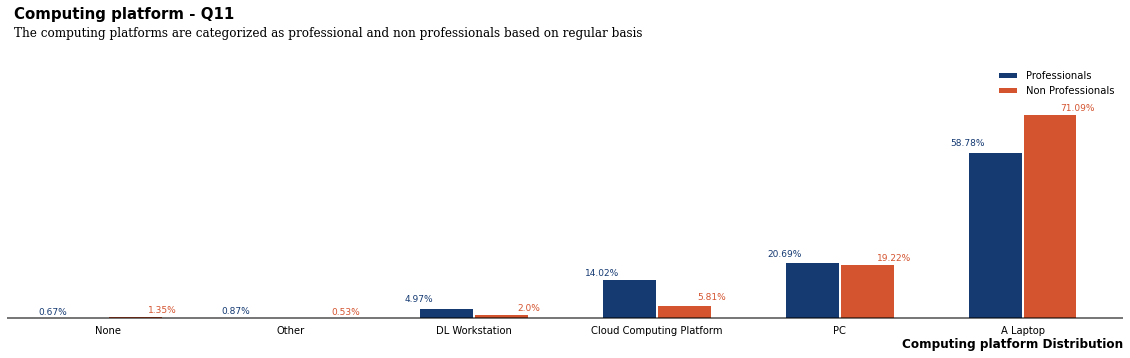

In [9]:
cp_p = professionals["Q11"]
cp_np = non_professionals["Q11"]

cp_p = (cp_p.value_counts()/cp_p.value_counts().sum()*100).round(2)
cp_np = (cp_np.value_counts()/cp_np.value_counts().sum()*100).round(2)

cp_p = cp_p
cp_df = pd.DataFrame({"Professionals": cp_p, "Non Professionals": cp_np}, index = cp_p.index.T)

cp_df.loc[:, 'Professionals'] = cp_df.loc[:, 'Professionals'].astype(int)
cp_df.loc[:, 'Non Professionals'] = cp_df.loc[:, 'Non Professionals'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
cp_df[::-1].plot.bar(width=0.6, color=[p_color, n_color], ax=ax, ec='#FFF', lw=2)
cp_df = cp_df.set_axis(['A Laptop', 'PC', 'Cloud Computing Platform','DL Workstation', 'Other', 'None'], axis=0)
for index, i in enumerate(cp_p[::-1].index):
    if index <= 7:
        ax.annotate(f"{cp_p[i]}%", xy=(index-0.3, cp_p[i] + 2), c=p_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{cp_np[i]}%", xy=(index+0.3, cp_np[i] + 2), c=n_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{cp_df[::-1].index[index]}", xy=(index, -4), va = 'center', ha='center',fontweight='light')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.13, 1, 'Computing platform - Q11', fontsize=15, fontweight='bold')
fig.text(0.13, 0.95, 'The computing platforms are categorized as professional and non professionals based on regular basis', fontsize=12, fontweight='light', fontfamily='serif')
plt.axhline(y = 0.5, color = 'black', linewidth = 1.5, alpha = .7)


ax.set_axisbelow(True)

ax.set_xlabel("Computing platform Distribution", fontsize=12, fontweight='bold',loc='right',y=-4.5)
plt.xticks(np.arange(0), [])
ax.get_yaxis().set_visible(False)
plt.yticks(np.arange(-5, 90, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

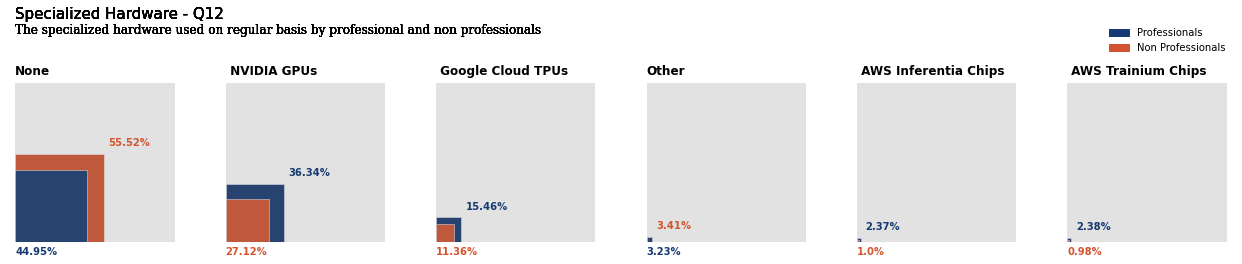

In [10]:
temp_spl_hw_p = professionals.filter(like="Q12")
temp_spl_hw_np = non_professionals.filter(like="Q12")

temp1 = []
temp2 = []

for i in range(len(temp_spl_hw_p.columns)):
    p_value = temp_spl_hw_p.iloc[:, i].value_counts()
    np_value = temp_spl_hw_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
spl_hw_p = pd.concat(temp1)
spl_hw_np = pd.concat(temp2)

spl_hw_p = (spl_hw_p/len(professionals)*100).round(2)
spl_hw_np = (spl_hw_np/len(non_professionals)*100).round(2)

spl_hw_df = pd.DataFrame({"Professionals": spl_hw_p, "Non Professionals": spl_hw_np}, index = spl_hw_p.index.T)

spl_hw_df_g = spl_hw_df

spl_hw_df_g["Total"] = spl_hw_df_g["Professionals"] + spl_hw_df_g["Non Professionals"]
spl_hw_df_g.sort_values("Total", ascending=False, inplace=True)

spl_hw_df_g = spl_hw_df_g.div(100)

row = 1
col = 6
fig = plt.figure(figsize=(22, row*4))
for i in range(len(spl_hw_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = spl_hw_df_g.iloc[i, 0]
    non_professional_percent = spl_hw_df_g.iloc[i, 1]
    fig.text(0.13, 1, 'Specialized Hardware - Q12', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.95, 'The specialized hardware used on regular basis by professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="bold")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="bold")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="bold")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="bold")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="bold")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="bold")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="bold")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="bold")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="bold")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="bold")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="bold")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="bold")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, spl_hw_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

### Points to notice:
* **NVIDIA GPU** have lot of reach
* **AWS Products** are not have reach among surveyers

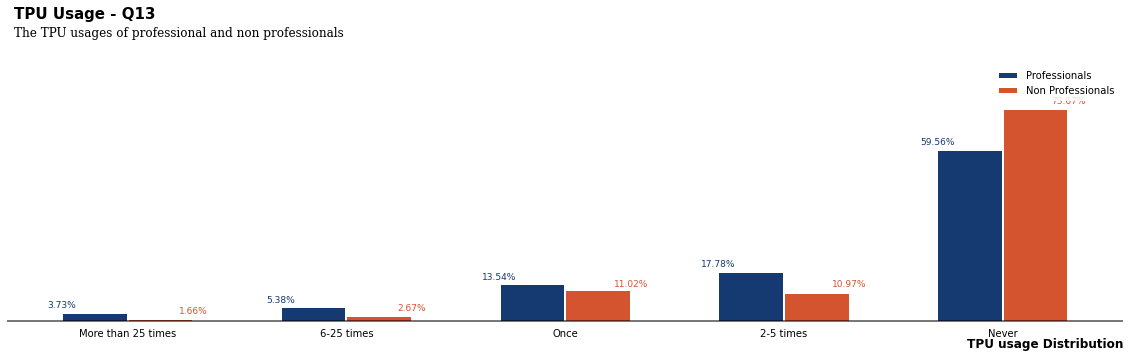

In [11]:
hm_tpu_p = professionals["Q13"]
hm_tpu_np = non_professionals["Q13"]

hm_tpu_p = (hm_tpu_p.value_counts()/hm_tpu_p.value_counts().sum()*100).round(2)
hm_tpu_np = (hm_tpu_np.value_counts()/hm_tpu_np.value_counts().sum()*100).round(2)

hm_tpu_p = hm_tpu_p
hm_tpu_df = pd.DataFrame({"Professionals": hm_tpu_p, "Non Professionals": hm_tpu_np}, index = hm_tpu_p.index.T)

hm_tpu_df.loc[:, 'Professionals'] = hm_tpu_df.loc[:, 'Professionals'].astype(int)
hm_tpu_df.loc[:, 'Non Professionals'] = hm_tpu_df.loc[:, 'Non Professionals'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
hm_tpu_df[::-1].plot.bar(width=0.6, color=[p_color, n_color], ax=ax, ec='#FFF', lw=2)
# hm_tpu_df = hm_tpu_df.set_axis(['A Laptop', 'PC', 'Cloud Computing Platform','DL Workstation', 'Other', 'None'], axis=0)
for index, i in enumerate(hm_tpu_p[::-1].index):
    if index <= 7:
        ax.annotate(f"{hm_tpu_p[i]}%", xy=(index-0.3, hm_tpu_p[i] + 2), c=p_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{hm_tpu_np[i]}%", xy=(index+0.3, hm_tpu_np[i] + 2), c=n_color, va = 'center', ha='center',fontweight='light', fontsize=9, stretch=1000)
        ax.annotate(f"{hm_tpu_df[::-1].index[index]}", xy=(index, -4), va = 'center', ha='center',fontweight='light')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.13, 1, 'TPU Usage - Q13', fontsize=15, fontweight='bold')
fig.text(0.13, 0.95, 'The TPU usages of professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')

plt.axhline(y = 0.5, color = 'black', linewidth = 1.5, alpha = .7)


ax.set_axisbelow(True)

ax.set_xlabel("TPU usage Distribution", fontsize=12, fontweight='bold',loc='right',y=-2.5)
plt.xticks(np.arange(0), [])
ax.get_yaxis().set_visible(False)
plt.yticks(np.arange(-4, 90, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

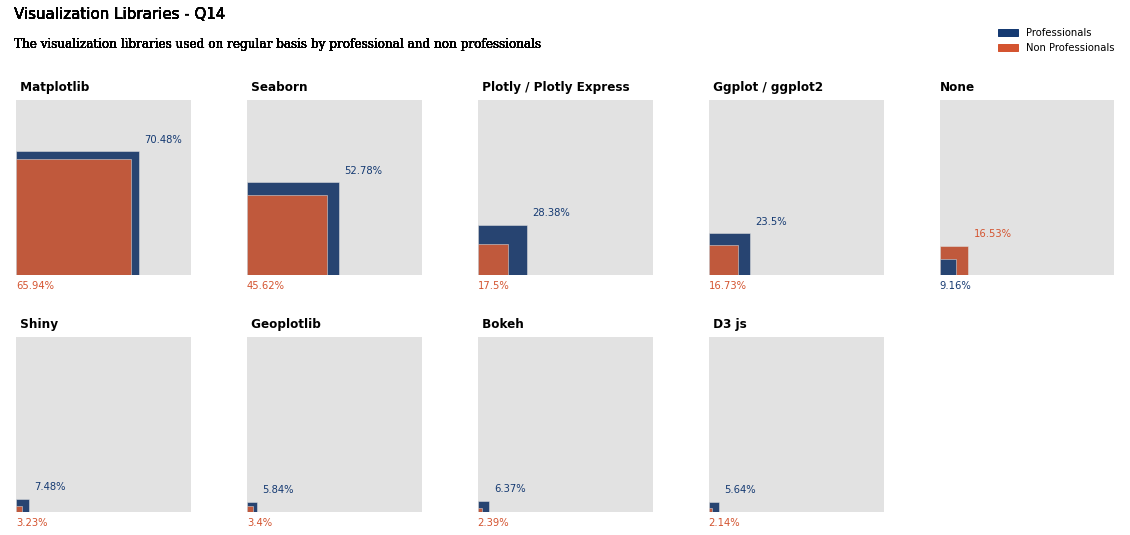

In [12]:
temp_viz_lib_p = professionals.filter(like="Q14")
temp_viz_lib_np = non_professionals.filter(like="Q14")

temp1 = []
temp2 = []

for i in range(len(temp_viz_lib_p.columns)):
    p_value = temp_viz_lib_p.iloc[:, i].value_counts()
    np_value = temp_viz_lib_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
viz_lib_p = pd.concat(temp1)
viz_lib_np = pd.concat(temp2)

viz_lib_p = (viz_lib_p/len(professionals)*100).round(2)
viz_lib_np = (viz_lib_np/len(non_professionals)*100).round(2)

viz_lib_df = pd.DataFrame({"Professionals": viz_lib_p, "Non Professionals": viz_lib_np}, index = viz_lib_p.index.T)

viz_lib_df_g = viz_lib_df.loc[(viz_lib_df["Professionals"] >= 4) | (viz_lib_df["Non Professionals"] >= 4)]

viz_lib_df_g["Total"] = viz_lib_df_g["Professionals"] + viz_lib_df_g["Non Professionals"]
viz_lib_df_g.sort_values("Total", ascending=False, inplace=True)

viz_lib_df_g = viz_lib_df_g.div(100)

row = 2
col = 5
fig = plt.figure(figsize=(20, row*4))
for i in range(len(viz_lib_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = viz_lib_df_g.iloc[i, 0]
    non_professional_percent = viz_lib_df_g.iloc[i, 1]
    fig.text(0.13, 1, 'Visualization Libraries - Q14', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.95, 'The visualization libraries used on regular basis by professional and non professionals', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="roman")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="roman")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="roman")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="roman")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, viz_lib_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

### Points to notice:
* **Matplotlib** mostly used visualization library among surveyers
* **D3 js** have minimal reach among surveyers

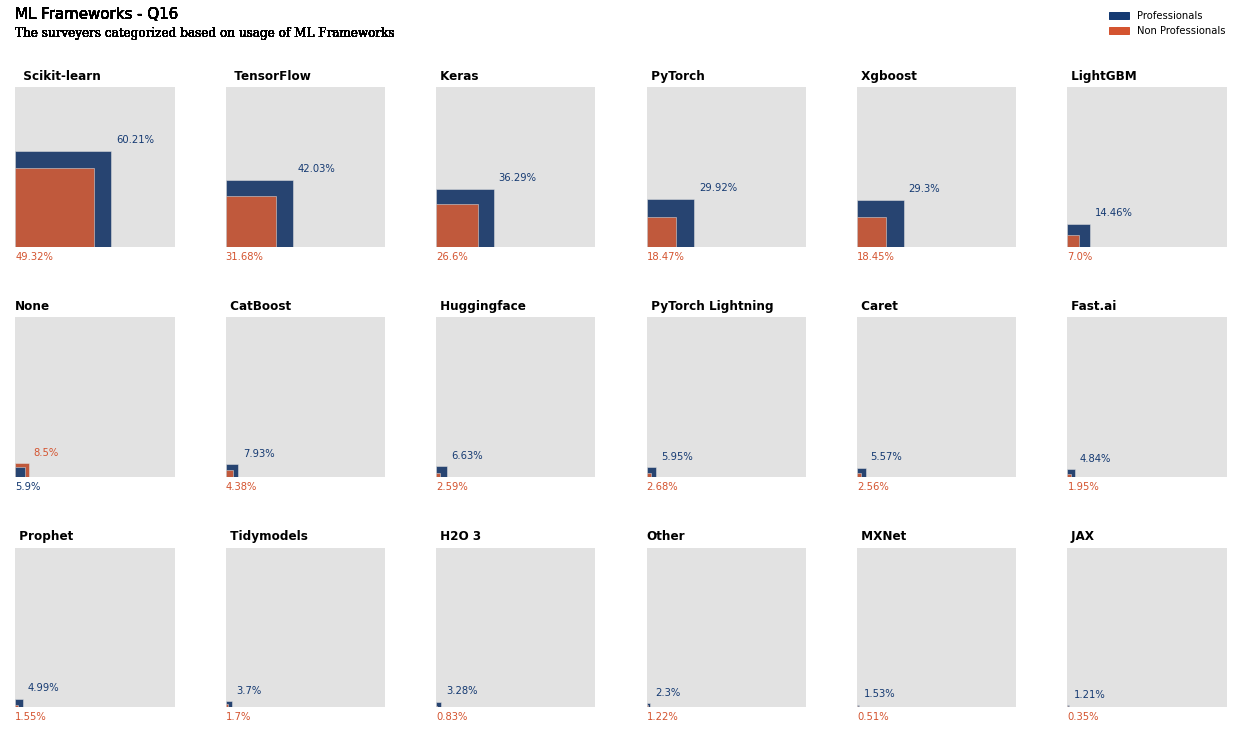

In [13]:
temp_ml_fw_p = professionals.filter(like="Q16")
temp_ml_fw_np = non_professionals.filter(like="Q16")

temp1 = []
temp2 = []

for i in range(len(temp_ml_fw_p.columns)):
    p_value = temp_ml_fw_p.iloc[:, i].value_counts()
    np_value = temp_ml_fw_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
ml_fw_p = pd.concat(temp1)
ml_fw_np = pd.concat(temp2)

ml_fw_p = (ml_fw_p/len(professionals)*100).round(2)
ml_fw_np = (ml_fw_np/len(non_professionals)*100).round(2)

ml_fw_df = pd.DataFrame({"Professionals": ml_fw_p, "Non Professionals": ml_fw_np}, index = ml_fw_p.index.T)

ml_fw_df_g = ml_fw_df

ml_fw_df_g["Total"] = ml_fw_df_g["Professionals"] + ml_fw_df_g["Non Professionals"]
ml_fw_df_g.sort_values("Total", ascending=False, inplace=True)

ml_fw_df_g = ml_fw_df_g.div(100)

row = 3
col = 6
fig = plt.figure(figsize=(22, row*4))
for i in range(len(ml_fw_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = ml_fw_df_g.iloc[i, 0]
    non_professional_percent = ml_fw_df_g.iloc[i, 1]
    fig.text(0.13, 0.94, 'ML Frameworks - Q16', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.92, 'The surveyers categorized based on usage of ML Frameworks', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="roman")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="roman")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="roman")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="roman")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, ml_fw_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 0.96))
plt.show()

### Points to notice:
* All **ML Frameworks** have nearly equal difference among surveyers, but tends to move more towards professionals.

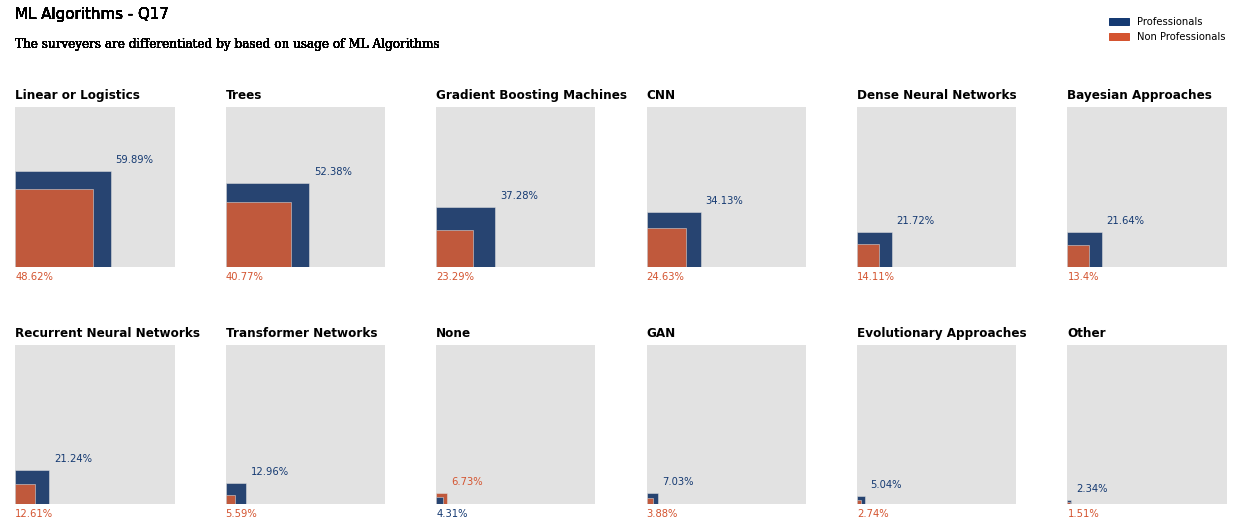

In [14]:
temp_ml_algo_p = professionals.filter(like="Q17")
temp_ml_algo_np = non_professionals.filter(like="Q17")

temp1 = []
temp2 = []

for i in range(len(temp_ml_algo_p.columns)):
    p_value = temp_ml_algo_p.iloc[:, i].value_counts()
    np_value = temp_ml_algo_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
ml_algo_p = pd.concat(temp1)
ml_algo_np = pd.concat(temp2)

ml_algo_p = (ml_algo_p/len(professionals)*100).round(2)
ml_algo_np = (ml_algo_np/len(non_professionals)*100).round(2)

ml_algo_df = pd.DataFrame({"Professionals": ml_algo_p, "Non Professionals": ml_algo_np}, index = ml_algo_p.index.T)

ml_algo_df_g = ml_algo_df

ml_algo_df_g["Total"] = ml_algo_df_g["Professionals"] + ml_algo_df_g["Non Professionals"]
ml_algo_df_g.sort_values("Total", ascending=False, inplace=True)

ml_algo_df_g = ml_algo_df_g.div(100)
ml_algo_df_g = ml_algo_df_g.set_axis(['Linear or Logistics', 'Trees', 'Gradient Boosting Machines', 'CNN', 'Dense Neural Networks', 'Bayesian Approaches', 'Recurrent Neural Networks', 'Transformer Networks', 'None', 'GAN', 'Evolutionary Approaches', 'Other'], axis=0)

row = 2
col = 6
fig = plt.figure(figsize=(22, row*4))
for i in range(len(ml_algo_df_g)):
    ax = fig.add_subplot(row, col, i+1)
    professional_percent = ml_algo_df_g.iloc[i, 0]
    non_professional_percent = ml_algo_df_g.iloc[i, 1]
    fig.text(0.13, 1, 'ML Algorithms - Q17', fontsize=15, fontweight='roman')
    fig.text(0.13, 0.95, 'The surveyers are differentiated by based on usage of ML Algorithms', fontsize=12, fontweight='light', fontfamily='serif')
    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    ax.set(adjustable='box', aspect='equal')
    if professional_percent > non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent-0.03, professional_percent-0.12, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="right", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        if non_professional_percent > 0.2:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
    elif professional_percent == non_professional_percent:
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(non_professional_percent/2, non_professional_percent/2, str(round(professional_percent*100, 2))+"%", size="medium", c='#FFF', ha="center", va="center", weight="roman")
            ax.text(non_professional_percent/2, non_professional_percent/2-1, "Same percentile", size="medium", c='#FFFFFFCC', ha="center", va="center", weight="roman")
            
        else:
            ax.text(0, -0.08, str(non_professional_percent*100)+"%", size="medium", c='#000', ha="left", weight="roman")
            ax.text(0, -0.15, "Same Percentile", size="medium", c='#000000CC', ha="left", weight="roman")
    else:
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent-0.03, non_professional_percent-0.12, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="right", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        if professional_percent > 0.2:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(0, -0.08, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax.text(0, 1.05, ml_algo_df_g.index.values[i], size="large", weight="bold")

    ax.set_xticks([])
    ax.set_yticks([])

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1.02))
plt.show()

### Points to notice:
* **ML Algorithms** users are too biased by professionals

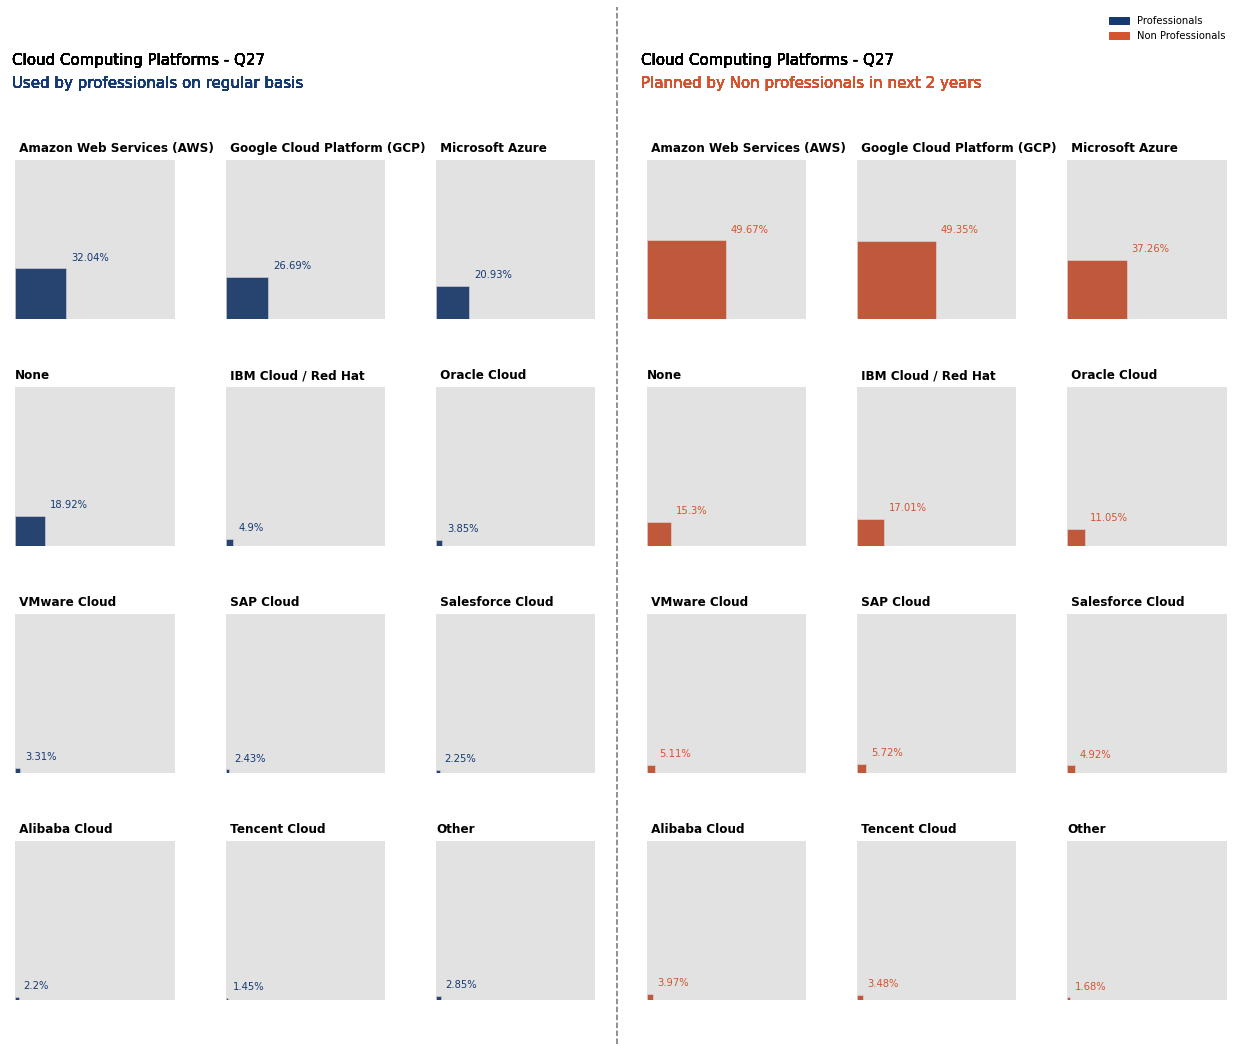

In [15]:
temp_c_comp_p = professionals.filter(like="Q27_A")
temp_c_comp_np = non_professionals.filter(like="Q27_B")

temp1 = []
temp2 = []

for i in range(len(temp_c_comp_p.columns)):
    p_value = temp_c_comp_p.iloc[:, i].value_counts()
    np_value = temp_c_comp_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
c_comp_p = pd.concat(temp1)
c_comp_np = pd.concat(temp2)

c_comp_p = (c_comp_p/len(professionals)*100).round(2)
c_comp_np = (c_comp_np/len(non_professionals)*100).round(2)

c_comp_df = pd.DataFrame({"Professionals": c_comp_p, "Non Professionals": c_comp_np}, index = c_comp_p.index.T)

c_comp_df_g = c_comp_df
c_comp_df_g["Total"] = c_comp_df_g["Professionals"] + c_comp_df_g["Non Professionals"]
c_comp_df_g.sort_values("Total", ascending=False, inplace=True)

c_comp_df_g = c_comp_df_g.div(100)
row = 4
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))
for i in range(2*len(c_comp_df_g)):
    if i in te:
        if prof_temp == len(c_comp_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = c_comp_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Cloud Computing Platforms - Q27', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.93, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, c_comp_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(c_comp_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = c_comp_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Cloud Computing Platforms - Q27', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.93, 'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, c_comp_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.1, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

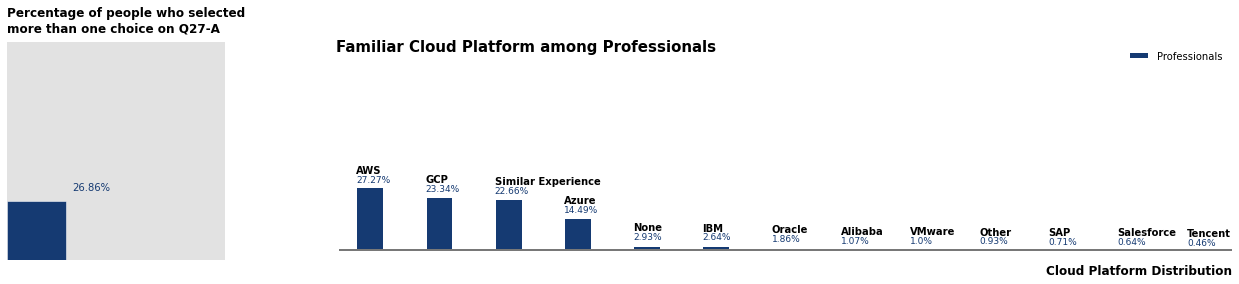

In [16]:
def cloud_inherit_1(ax1, choice_value):
    ax1.set(adjustable='box', aspect='equal')
    professional_percent = choice_value/100
    ax1.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
    ax1.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
    ax1.text(0, 1.05, "Percentage of people who selected\nmore than one choice on Q27-A", size="large", weight="bold")
    ax1.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
    ax1.set_xlim(0, 1)

choice_value = (professionals['Q28'].value_counts().sum()/len(professionals)*100).round(2)

fig = plt.figure(figsize=(22, 4))

widths = [1, 4]
gs0 = gridspec.GridSpec(1, 2, figure=fig, width_ratios=widths)

gs00 = gs0[0].subgridspec(1, 1)



ax1 = fig.add_subplot(gs00[0, 0])
cloud_inherit_1(ax1,  choice_value)


l1 = lines.Line2D([1.15, 1.15], [0, 1.15], transform=fig.transFigure, figure=fig, color='black',lw=0.2)

for s in ['top', 'left', 'right', 'bottom']:
    ax1.spines[s].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])


gs01 = gs0[1].subgridspec(1, 1)

ax4 = fig.add_subplot(gs01[0, 0])


cloud_comp_mo_p = professionals["Q28"]


cloud_comp_mo_p = (cloud_comp_mo_p.value_counts()/cloud_comp_mo_p.value_counts().sum()*100).round(2)

cloud_comp_mo_p = cloud_comp_mo_p[::-1]
cloud_comp_mo_df = pd.DataFrame({"Professionals": cloud_comp_mo_p}, index = cloud_comp_mo_p.index.T)

cloud_comp_mo_df.loc[:, 'Professionals'] = cloud_comp_mo_df.loc[:, 'Professionals'].astype(int)
cloud_names = ["AWS", "GCP", "Similar Experience", "Azure", "None", "IBM", "Oracle", "Alibaba", "VMware", "Other", "SAP", "Salesforce", "Tencent"]
cloud_comp_mo_df[::-1].plot.bar(width=0.4, color=p_color, ax=ax4, ec='#FFF', lw=2)
for index, i in enumerate(cloud_comp_mo_p[::-1].index):
    if index >= 0:
        ax4.annotate(f"{cloud_comp_mo_p[i]}%", xy=(index-0.2, cloud_comp_mo_p[i] + 3), c=p_color, va = 'center', ha='left',fontweight='light', fontsize=9, stretch=1000)
        ax4.annotate(f"{cloud_names[index]}", xy=(index-0.2, cloud_comp_mo_p[i] + 7), va = 'center', ha='left',fontweight='bold')
for s in ['top', 'left', 'right', 'bottom']:
    ax4.spines[s].set_visible(False)
    

ax4.text(-0.5, 85, 'Familiar Cloud Platform among Professionals', fontsize=15, fontweight='bold')

plt.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)

l1 = lines.Line2D([1.15, 1.15], [0, 1.15], transform=fig.transFigure, figure=fig, color='black',lw=0.2)

ax.set_axisbelow(True)

ax4.set_xlabel("Cloud Platform Distribution", fontsize=12, fontweight='bold',loc='right',y=-2.5)
ax4.set_xticks([])
ax4.get_yaxis().set_visible(False)
ax4.set_yticks(np.arange(-4, 90, 1))
plt.legend(facecolor="#FFF", edgecolor="#FFF")
plt.show()

### Points to notice:
* Noted

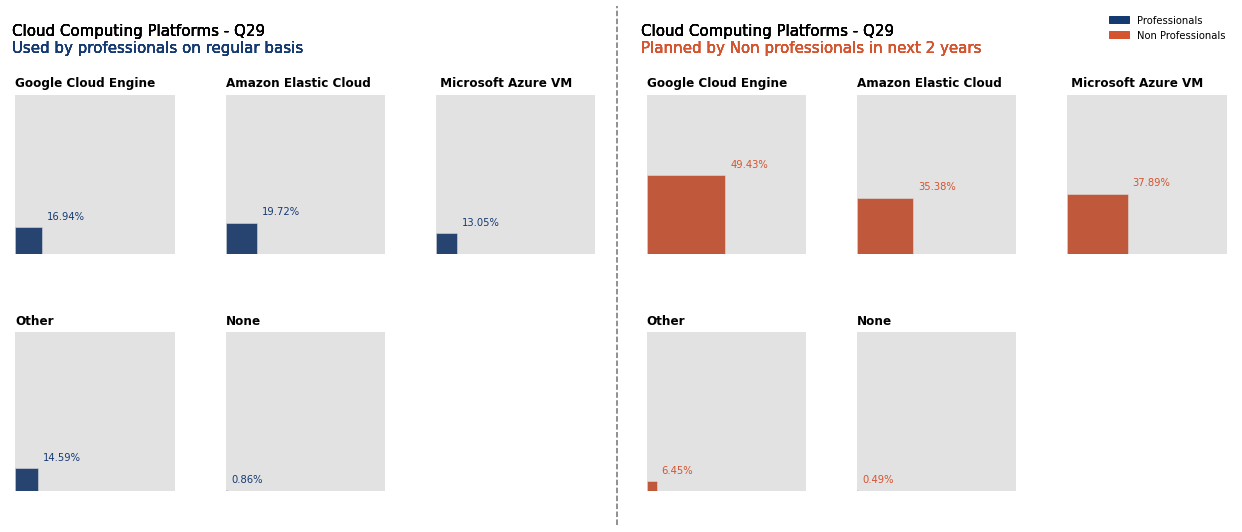

In [17]:
temp_cc_prod_p = professionals.filter(like="Q29_A")
temp_cc_prod_np = non_professionals.filter(like="Q29_B")

temp1 = []
temp2 = []

for i in range(len(temp_cc_prod_p.columns)):
    p_value = temp_cc_prod_p.iloc[:, i].value_counts()
    np_value = temp_cc_prod_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
cc_prod_p = pd.concat(temp1)
cc_prod_np = pd.concat(temp2)

cc_prod_p = (cc_prod_p/len(professionals)*100).round(2)
cc_prod_np = (cc_prod_np/len(non_professionals)*100).round(2)

cc_prod_np.rename(index={'None': 'No / None'}, inplace=True)

cc_prod_df = pd.DataFrame({"Professionals": cc_prod_p, "Non Professionals": cc_prod_np}, index = cc_prod_p.index.T)

cc_prod_df_g = cc_prod_df

cc_prod_df_g["Total"] = cc_prod_df['Professionals'] + cc_prod_df['Non Professionals']
cc_prod_df_g.sort_values("Total", ascending=False, inplace=True)

cc_prod_df_g = cc_prod_df_g.div(100)


row = 2
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()
prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))

cc_prod_df_g = cc_prod_df_g.set_axis(['Google Cloud Engine', 'Amazon Elastic Cloud', ' Microsoft Azure VM', 'Other', 'None'], axis=0)

for i in range(3*len(cc_prod_df_g)):
    if i in te:
        if prof_temp == len(cc_prod_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = cc_prod_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Cloud Computing Platforms - Q29', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.92, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, cc_prod_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(cc_prod_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = cc_prod_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Cloud Computing Platforms - Q29', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.92, 'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, cc_prod_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.1, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

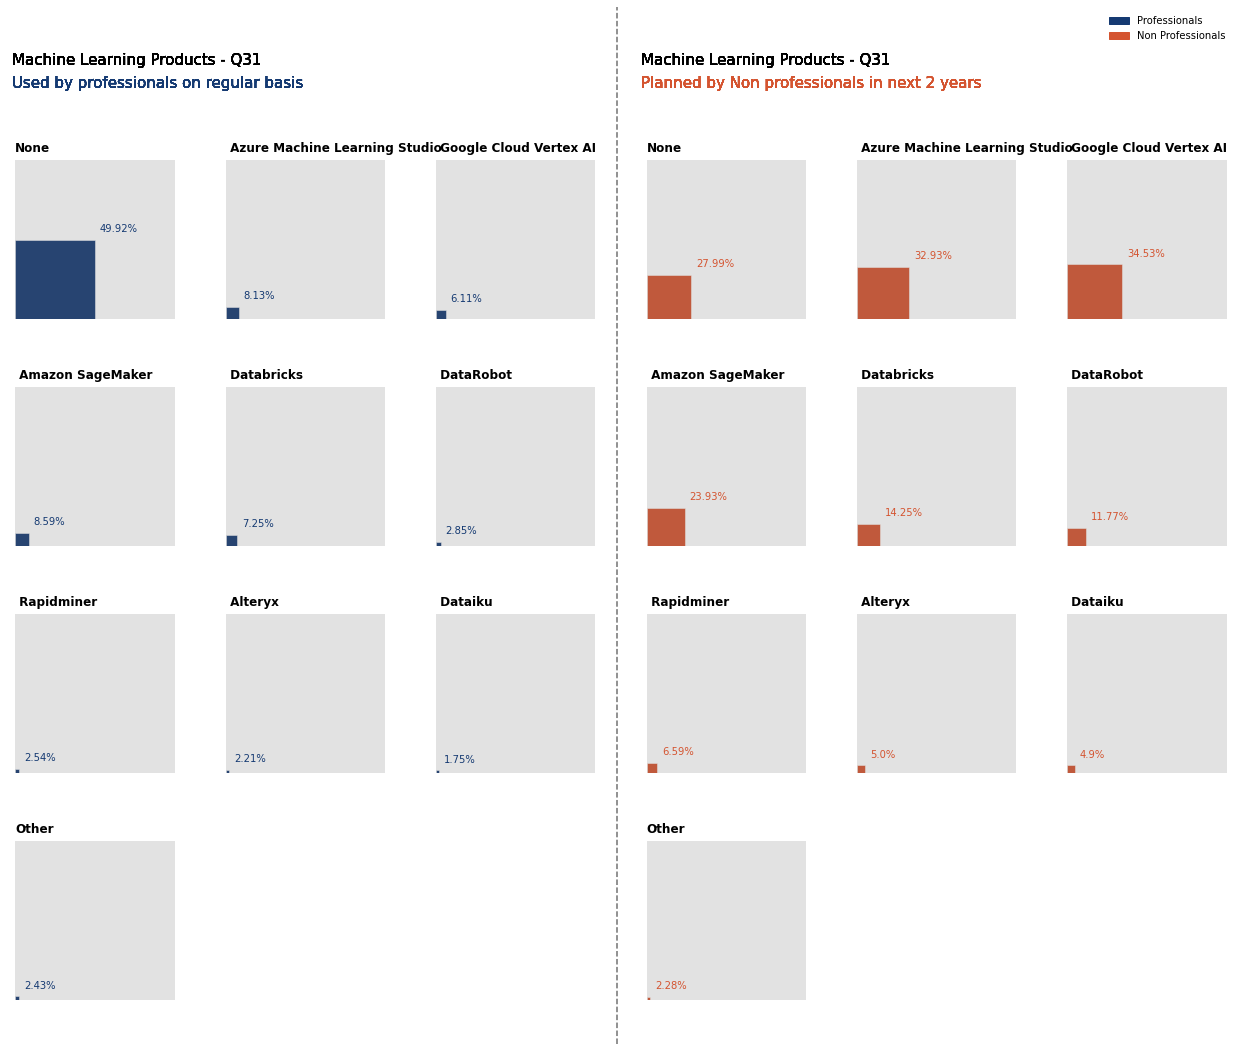

In [18]:
temp_ml_prod_p = professionals.filter(like="Q31_A")
temp_ml_prod_np = non_professionals.filter(like="Q31_B")

temp1 = []
temp2 = []

for i in range(len(temp_ml_prod_p.columns)):
    p_value = temp_ml_prod_p.iloc[:, i].value_counts()
    np_value = temp_ml_prod_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
ml_prod_p = pd.concat(temp1)
ml_prod_np = pd.concat(temp2)


ml_prod_p = (ml_prod_p/len(professionals)*100).round(2)
ml_prod_np = (ml_prod_np/len(non_professionals)*100).round(2)
ml_prod_p.rename(index={'No / None': 'None'}, inplace=True)

ml_prod_df = pd.DataFrame({"Professionals": ml_prod_p, "Non Professionals": ml_prod_np}, index = ml_prod_p.index.T)


ml_prod_df_g = ml_prod_df
ml_prod_df_g["Total"] = ml_prod_df_g["Professionals"] + ml_prod_df_g["Non Professionals"]
ml_prod_df_g.sort_values("Total", ascending=False, inplace=True)
ml_prod_df_g = ml_prod_df_g.div(100)
row = 4
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))

for i in range(3*len(ml_prod_df_g)):
    if i in te:
        if prof_temp == len(ml_prod_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = ml_prod_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Machine Learning Products - Q31', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.93, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, ml_prod_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(ml_prod_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = ml_prod_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Machine Learning Products - Q31', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.93, 'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, ml_prod_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.1, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

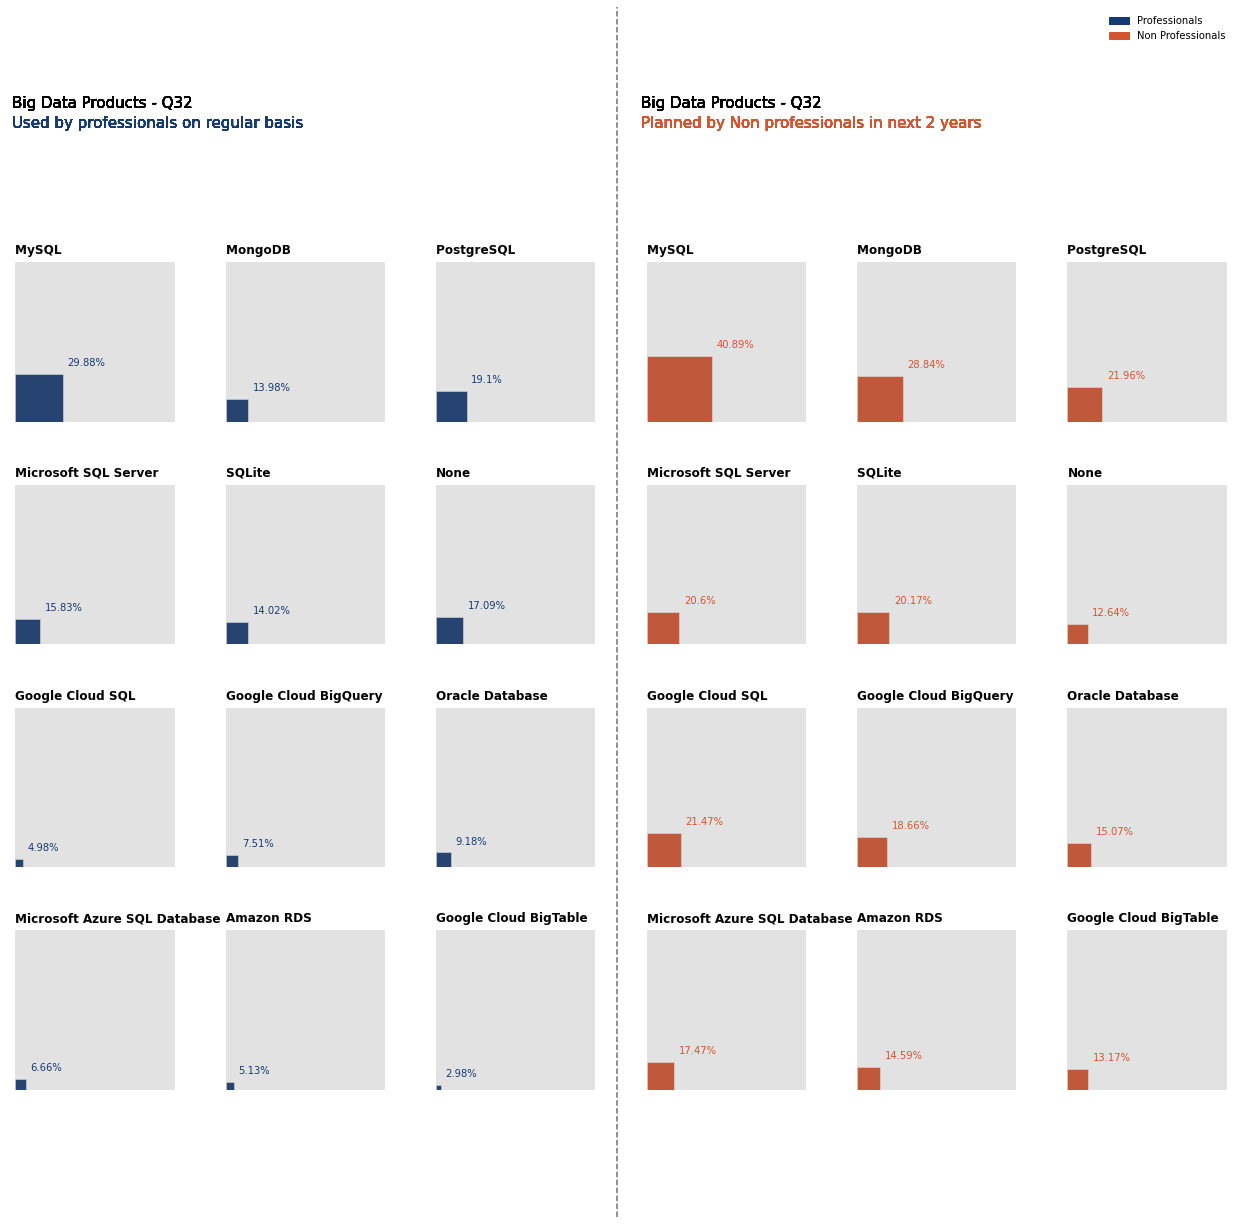

In [19]:
temp_bd_prod_p = professionals.filter(like="Q32_A")
temp_bd_prod_np = non_professionals.filter(like="Q32_B")

temp1 = []
temp2 = []

for i in range(len(temp_bd_prod_p.columns)):
    p_value = temp_bd_prod_p.iloc[:, i].value_counts()
    np_value = temp_bd_prod_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
bd_prod_p = pd.concat(temp1)
bd_prod_np = pd.concat(temp2)

bd_prod_p = (bd_prod_p/len(professionals)*100).round(2)
bd_prod_np = (bd_prod_np/len(non_professionals)*100).round(2)

bd_prod_df = pd.DataFrame({"Professionals": bd_prod_p, "Non Professionals": bd_prod_np}, index = bd_prod_p.index.T)

bd_prod_df_g = bd_prod_df
bd_prod_df_g["Total"] = bd_prod_df_g["Professionals"] + bd_prod_df_g["Non Professionals"]
bd_prod_df_g.sort_values("Total", ascending=False, inplace=True)

bd_prod_df_g = bd_prod_df_g.div(100)
row = 7
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))
for i in range(2*len(bd_prod_df_g)):
    if i in te:
        if prof_temp == len(bd_prod_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = bd_prod_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Big Data Products - Q32', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.94, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')

        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, bd_prod_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(bd_prod_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = bd_prod_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Big Data Products - Q32', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.94,'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, bd_prod_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.4, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

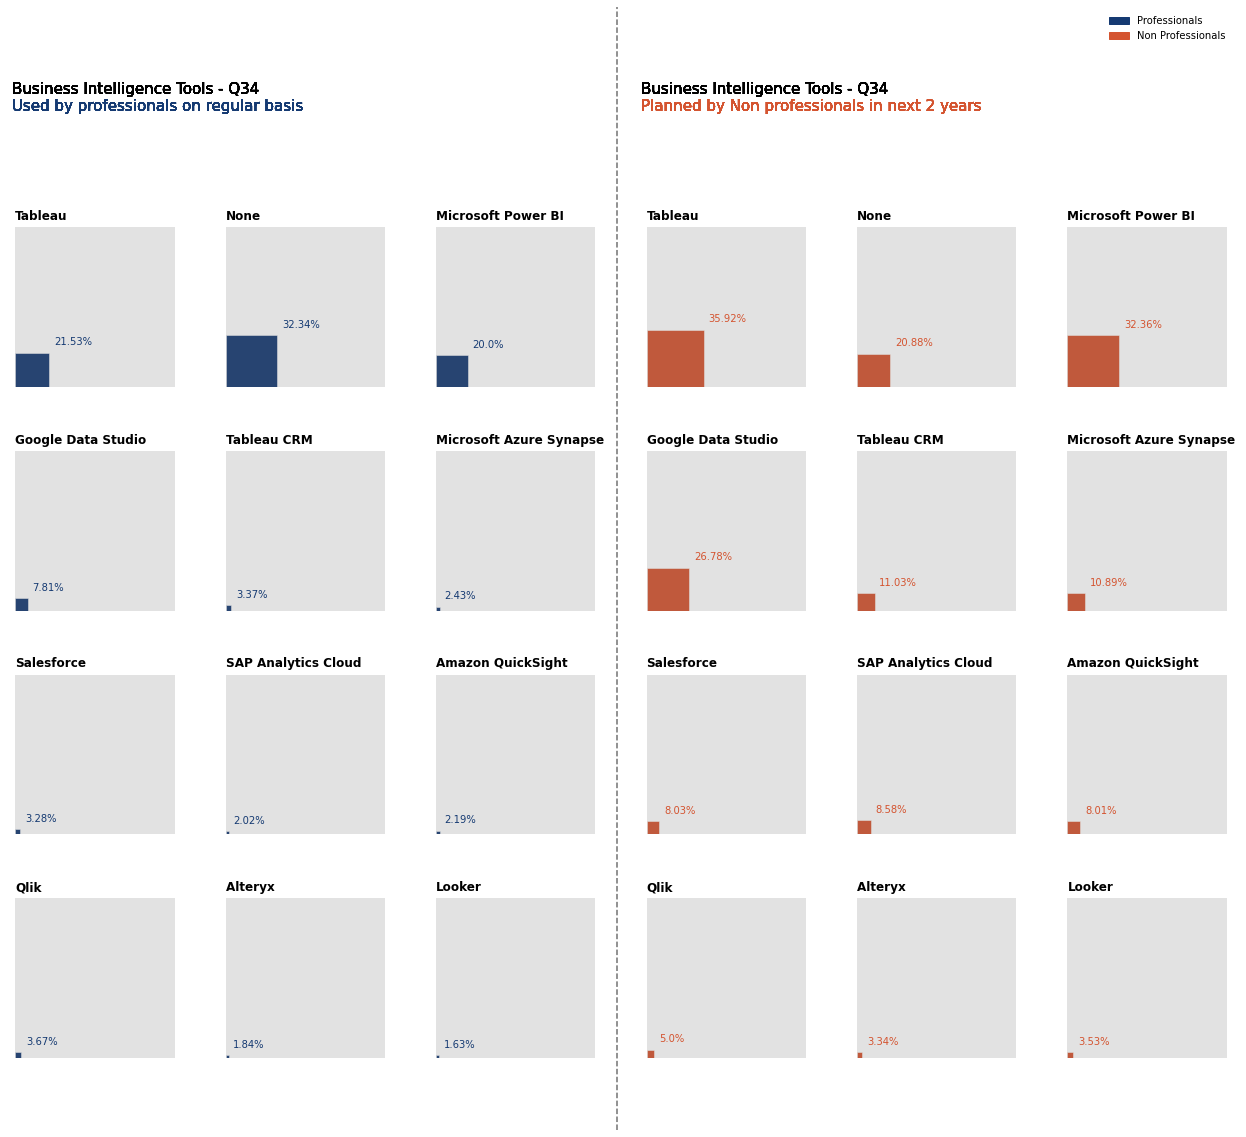

In [20]:
temp_bi_tool_p = professionals.filter(like="Q34_A")
temp_bi_tool_np = non_professionals.filter(like="Q34_B")

temp1 = []
temp2 = []

for i in range(len(temp_bi_tool_p.columns)):
    p_value = temp_bi_tool_p.iloc[:, i].value_counts()
    np_value = temp_bi_tool_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
bi_tool_p = pd.concat(temp1)
bi_tool_np = pd.concat(temp2)

bi_tool_p = (bi_tool_p/len(professionals)*100).round(2)
bi_tool_np = (bi_tool_np/len(non_professionals)*100).round(2)

bi_tool_df = pd.DataFrame({"Professionals": bi_tool_p, "Non Professionals": bi_tool_np}, index = bi_tool_p.index.T)

bi_tool_df_g = bi_tool_df
bi_tool_df_g["Total"] = bi_tool_df_g["Professionals"] + bi_tool_df_g["Non Professionals"]
bi_tool_df_g.sort_values("Total", ascending=False, inplace=True)

bi_tool_df_g = bi_tool_df_g.div(100)
row = 6
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))
for i in range(3*len(bi_tool_df_g)):
    if i in te:
        if prof_temp == len(bi_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = bi_tool_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Business Intelligence Tools - Q34', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.94, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')

        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, bi_tool_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(bi_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = bi_tool_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Business Intelligence Tools - Q34', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.94,'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, bi_tool_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.35, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

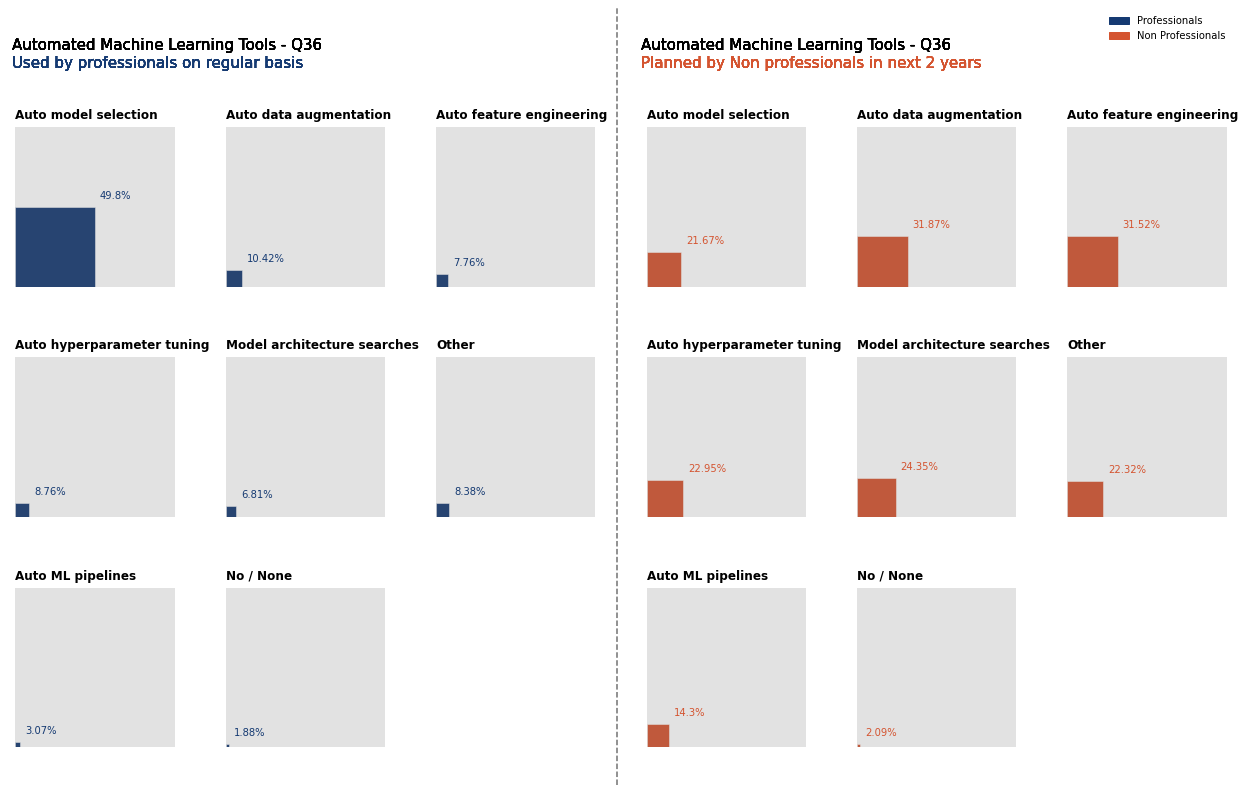

In [21]:
temp_auto_ml_tool_p = professionals.filter(like="Q36_A")
temp_auto_ml_tool_np = non_professionals.filter(like="Q36_B")

temp1 = []
temp2 = []

for i in range(len(temp_auto_ml_tool_p.columns)):
    p_value = temp_auto_ml_tool_p.iloc[:, i].value_counts()
    np_value = temp_auto_ml_tool_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
auto_ml_tool_p = pd.concat(temp1)
auto_ml_tool_np = pd.concat(temp2)

auto_ml_tool_np = auto_ml_tool_np.set_axis(auto_ml_tool_p.index, axis=0)

auto_ml_tool_p = (auto_ml_tool_p/len(professionals)*100).round(2)
auto_ml_tool_np = (auto_ml_tool_np/len(non_professionals)*100).round(2)

auto_ml_tool_df = pd.DataFrame({"Professionals": auto_ml_tool_p, "Non Professionals": auto_ml_tool_np}, index = auto_ml_tool_p.index.T)

auto_ml_tool_df_g = auto_ml_tool_df
auto_ml_tool_df_g["Total"] = auto_ml_tool_df_g["Professionals"] + auto_ml_tool_df_g["Non Professionals"]
auto_ml_tool_df_g.sort_values("Total", ascending=False, inplace=True)

auto_ml_tool_df_g = auto_ml_tool_df_g.div(100)
row = 3
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))
auto_ml_tool_df_g = auto_ml_tool_df_g.set_axis(['Auto model selection', 'Auto data augmentation', 'Auto feature engineering', 'Auto hyperparameter tuning', 'Model architecture searches', 'Other','Auto ML pipelines', 'No / None'], axis=0)
for i in range(3*len(auto_ml_tool_df_g)):
    if i in te:
        if prof_temp == len(auto_ml_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = auto_ml_tool_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Automated Machine Learning Tools - Q36', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.93, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')

        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, auto_ml_tool_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(auto_ml_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = auto_ml_tool_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Automated Machine Learning Tools - Q36', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.93,'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')

        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, auto_ml_tool_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.1, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

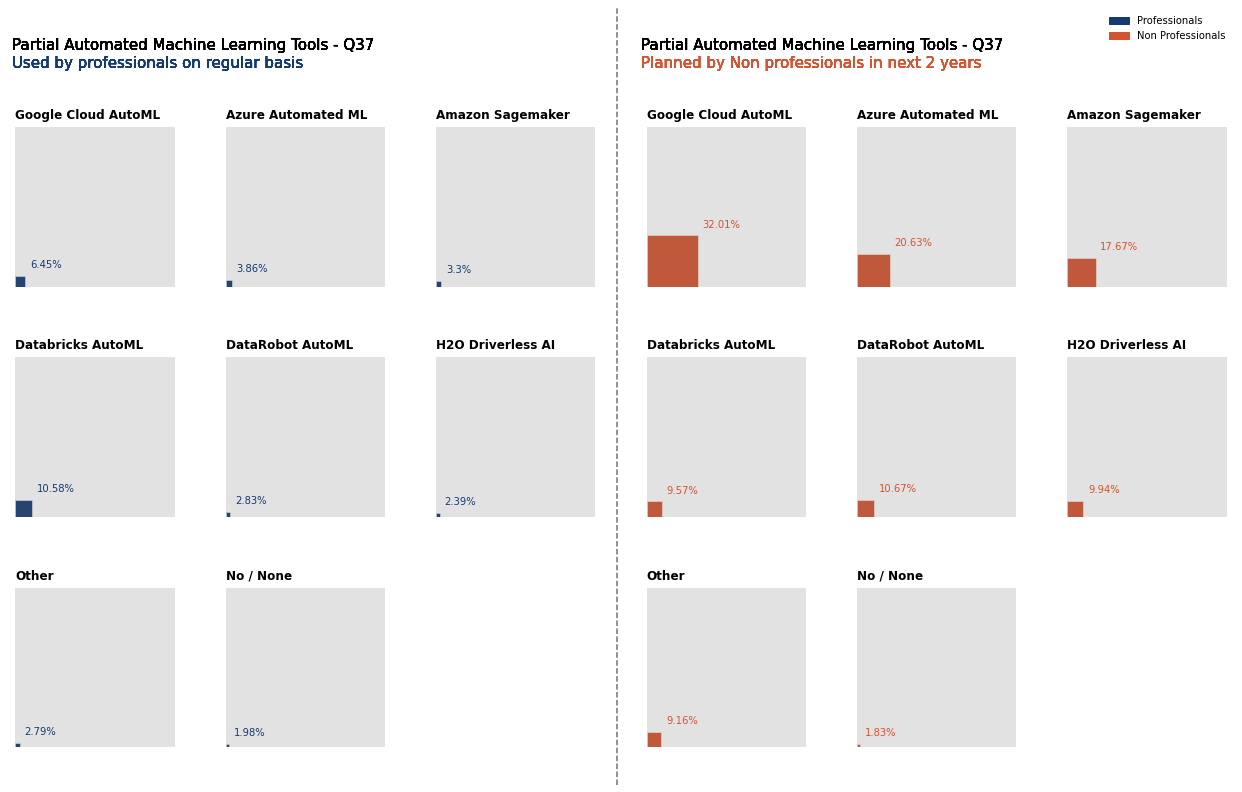

In [22]:
temp_partial_auto_ml_tool_p = professionals.filter(like="Q37_A")
temp_partial_auto_ml_tool_np = non_professionals.filter(like="Q37_B")

temp1 = []
temp2 = []

for i in range(len(temp_partial_auto_ml_tool_p.columns)):
    p_value = temp_partial_auto_ml_tool_p.iloc[:, i].value_counts()
    np_value = temp_partial_auto_ml_tool_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
partial_auto_ml_tool_p = pd.concat(temp1)
partial_auto_ml_tool_np = pd.concat(temp2)

partial_auto_ml_tool_np = partial_auto_ml_tool_np.set_axis(partial_auto_ml_tool_p.index, axis=0)


partial_auto_ml_tool_p = (partial_auto_ml_tool_p/len(professionals)*100).round(2)
partial_auto_ml_tool_np = (partial_auto_ml_tool_np/len(non_professionals)*100).round(2)

partial_auto_ml_tool_df = pd.DataFrame({"Professionals": partial_auto_ml_tool_p, "Non Professionals": partial_auto_ml_tool_np}, index = partial_auto_ml_tool_p.index.T)

partial_auto_ml_tool_df_g = partial_auto_ml_tool_df
partial_auto_ml_tool_df_g["Total"] = partial_auto_ml_tool_df_g["Professionals"] + partial_auto_ml_tool_df_g["Non Professionals"]
partial_auto_ml_tool_df_g.sort_values("Total", ascending=False, inplace=True)

partial_auto_ml_tool_df_g = partial_auto_ml_tool_df_g.div(100)
row = 3
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))
partial_auto_ml_tool_df_g = partial_auto_ml_tool_df_g.set_axis(['Google Cloud AutoML', 'Azure Automated ML', 'Amazon Sagemaker', 'Databricks AutoML', 'DataRobot AutoML', 'H2O Driverless AI', 'Other', 'No / None'], axis=0)
for i in range(3*len(partial_auto_ml_tool_df_g)):
    if i in te:
        if prof_temp == len(partial_auto_ml_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = partial_auto_ml_tool_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Partial Automated Machine Learning Tools - Q37', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.93, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')

        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, partial_auto_ml_tool_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(partial_auto_ml_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = partial_auto_ml_tool_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Partial Automated Machine Learning Tools - Q37', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.93,'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')

        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, partial_auto_ml_tool_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.1, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

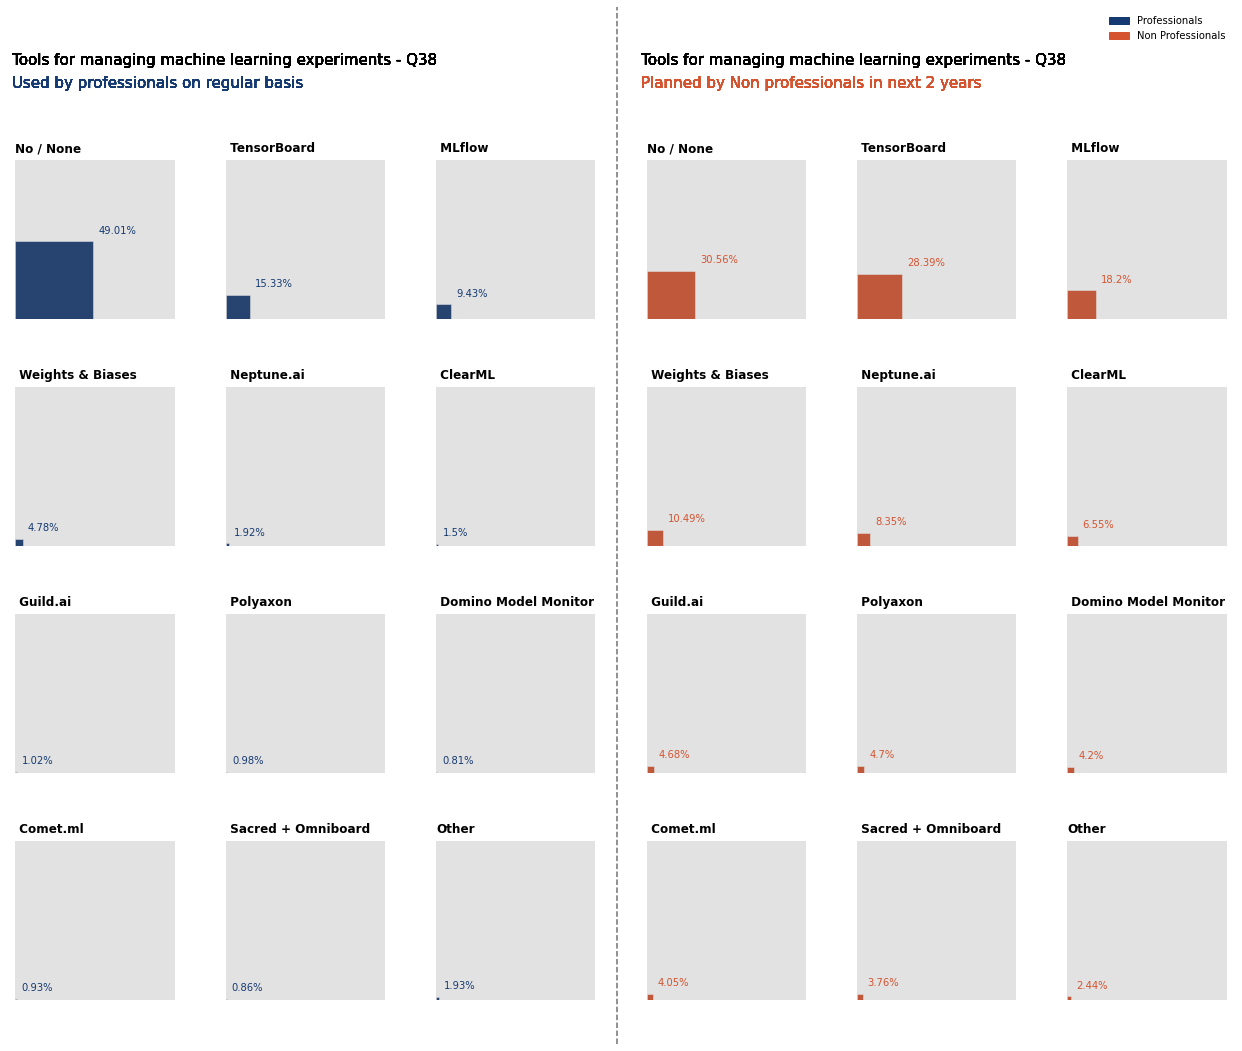

In [23]:
temp_ml_exp_tool_p = professionals.filter(like="Q38_A")
temp_ml_exp_tool_np = non_professionals.filter(like="Q38_B")

temp1 = []
temp2 = []

for i in range(len(temp_ml_exp_tool_p.columns)):
    p_value = temp_ml_exp_tool_p.iloc[:, i].value_counts()
    np_value = temp_ml_exp_tool_np.iloc[:, i].value_counts()
    temp1.append(p_value)
    temp2.append(np_value)
ml_exp_tool_p = pd.concat(temp1)
ml_exp_tool_np = pd.concat(temp2)

ml_exp_tool_np = ml_exp_tool_np.set_axis(ml_exp_tool_p.index, axis=0)

ml_exp_tool_p = (ml_exp_tool_p/len(professionals)*100).round(2)
ml_exp_tool_np = (ml_exp_tool_np/len(non_professionals)*100).round(2)

ml_exp_tool_df = pd.DataFrame({"Professionals": ml_exp_tool_p, "Non Professionals": ml_exp_tool_np}, index = ml_exp_tool_p.index.T)

ml_exp_tool_df_g = ml_exp_tool_df
ml_exp_tool_df_g["Total"] = ml_exp_tool_df_g["Professionals"] + ml_exp_tool_df_g["Non Professionals"]
ml_exp_tool_df_g.sort_values("Total", ascending=False, inplace=True)

ml_exp_tool_df_g = ml_exp_tool_df_g.div(100)
row = 4
col = 6

tl = np.arange(0, 24, 1)
maintl = []
temp_iter = 0
inner_iter = 0
while temp_iter < int(len(tl/3)):
    tl_i = []
    while inner_iter <3:
        tl_i.append(inner_iter+temp_iter)
        inner_iter+=1
    maintl.append(tl_i)
    temp_iter+=3
    inner_iter = 0

even_list = []
odd_list = []

for i in range(len(maintl)):
    if i%2==0:
        even_list.append(maintl[i])
    else:
        odd_list.append(maintl[i])

to = np.array(odd_list).flatten()
te = np.array(even_list).flatten()

prof_temp = 0
non_prof_temp = 0
fig = plt.figure(figsize=(22, row*4))
for i in range(3*len(ml_exp_tool_df_g)):
    if i in te:
        if prof_temp == len(ml_exp_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        professional_percent = ml_exp_tool_df_g.iloc[prof_temp, 0]
        fig.text(0.128, 0.95, 'Tools for managing machine learning experiments - Q38', fontsize=15, fontweight='roman')
        fig.text(0.128, 0.93, 'Used by professionals on regular basis', c=p_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')
        ax.axvspan(0, professional_percent, ymax=professional_percent, fc=p_color, ec='#FFF', lw=0.5)
        if professional_percent - non_professional_percent >= 0.25:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        else:
            ax.text(professional_percent+0.03, professional_percent+0.05, str(round(professional_percent*100, 2))+"%", size="medium", c=p_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, ml_exp_tool_df_g.index.values[prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        prof_temp += 1
    if i in to:
        if non_prof_temp == len(ml_exp_tool_df_g):
            continue
        ax = fig.add_subplot(row, col, i+1)
        non_professional_percent = ml_exp_tool_df_g.iloc[non_prof_temp, 1]
        fig.text(0.525, 0.95, 'Tools for managing machine learning experiments - Q38', fontsize=15, fontweight='roman')
        fig.text(0.525, 0.93,'Planned by Non professionals in next 2 years', c=n_color, fontsize=15, fontweight='roman')
        for s in ['top', 'left', 'right', 'bottom']:
            ax.spines[s].set_visible(False)
        ax.set(adjustable='box', aspect='equal')      
        ax.axvspan(0, non_professional_percent, ymax=non_professional_percent, fc=n_color, ec='#FFF', lw=0.5)
        if non_professional_percent - professional_percent >= 0.25:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        else:
            ax.text(non_professional_percent+0.03, non_professional_percent+0.05, str(round(non_professional_percent*100, 2))+"%", size="medium", c=n_color, ha="left", weight="roman")
        ax.axvspan(0, 1, ymax=1, fc='#707070', alpha=0.2)
        ax.text(0, 1.05, ml_exp_tool_df_g.index.values[non_prof_temp], size="large", weight="bold")
        ax.set_xticks([])
        ax.set_yticks([])
        non_prof_temp += 1

fig.add_artist(lines.Line2D([0.51, 0.51], [0.1, 1], color="#707070", ls="--"))

gray_patch = mpatches.Patch(color=p_color, label='Professionals')
steel_patch = mpatches.Patch(color=n_color, label='Non Professionals')

fig.legend(handles=[gray_patch, steel_patch], facecolor="#FFF", edgecolor="#FFF", loc=1, bbox_to_anchor=(0.9, 1))
plt.show()

### Findings
* We have **more professional men than women** as they differ from **5.79%**. On the other side,  There are **more non professional women than men** with the difference of **5.74%**
* **Inida** has larger percentage of non_professionals, and **USA** has larger percentage of professionals. Instead of normal India biased graphed, this could be a helpful information.
* **Python** is the most used programming language by almost everyone. 🤔 SQL tends to attract more professionals. Other languages like **Java script** and **Java** are having lower difference usage percentage among surveyers
* The python based **IDE's (Jupyter, Pycharm, etc..)** are having significant **professional users**. The **RStudio** is supposedly having **equal percentage** of professionals and non professionals. **Other IDE's** are used by **professionals** a little bit more than students and not employed people.
* **Paid Hosted Notebooks** based on Google, IBM, Amazon tends to attracts more professionals than **Non Paid Hosted Notebooks**. Non professionals are mostly using **kaggle** as their hosting platform.
* **Laptops** and **TPU's** are used more by non professionals as their computing platform.
* **Visualization Libraries** are mostly used by professionals. Regardless of languages and libraries they are only preferred by professionals in their regular basis than other non professional people
* **"Nvidia GPU's"** and **"Google Cloud TPU's"** are mostly used by professionals. But Non professionals tends to move towards selecting the "None"
* The **professionals** use **ML framework** more than student and not employed people in their regular basis.
* **Professionals** use **ML Algorithms** moret than non professionals in their regular basis.
* **Not every professional** is using specific cloud and big data products. Most of the people are falling under **None** category.
* **Microsoft**, **Google**, **Amazon** company products are planned to be learned by non professionals in the next 2 years.